<a href="https://colab.research.google.com/github/stefanciprian/rd/blob/main/prices_and_volumes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

Load data from CSV, but first you need to uload the CSV file in the File System in Google Collab.

In [ ]:
import pandas as pd

data = pd.read_csv('LUMN.csv')
data.head(10)
data.sort_index(ascending=False)

,Date,Open,High,Low,Close,Adj Close,Volume
252,2024-08-01,3.27,4.20,3.26,4.1306,4.1306,52773643
251,2024-07-31,2.59,3.15,2.36,3.1500,3.1500,75766000
250,2024-07-30,2.02,3.44,1.94,2.6700,2.6700,161091500
249,2024-07-29,1.80,1.99,1.75,1.9400,1.9400,31081100
248,2024-07-26,1.69,1.77,1.68,1.7700,1.7700,18386700
...,...,...,...,...,...,...,...
4,2023-08-07,1.71,1.75,1.64,1.7400,1.7400,30195600
3,2023-08-04,1.67,1.77,1.64,1.6600,1.6600,34052900
2,2023-08-03,1.76,1.78,1.68,1.6800,1.6800,19715300
1,2023-08-02,1.75,1.87,1.68,1.7900,1.7900,39992700


Get data from Yahoo

In [ ]:
!pip install yfinance==0.2.12

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.44
    Uninstalling yfinance-0.2.44:
      Successfully uninstalled yfinance-0.2.44


In [ ]:
import yfinance as yf
import datetime

data = []
ticker = "^VIX" # Example ticker for Microsoft
start_date = "2024-01-01"
end_date = datetime.date.today().strftime("%Y-%m-%d")

try:
    data = yf.download(ticker, start=start_date, end=end_date)

    # Reset the column names to avoid multi-index
    # data.columns.name = None

    if data.empty:
        print(f"No data found for {ticker} within the specified date range.")
    else:
        # Reset the index to remove the multi-index
        data = data.reset_index()

        # Rename columns to match CSV-like format
        data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
        data.sort_index(ascending=False)

        display(data)  # Display the formatted data
except Exception as e:
    print(f"An error occurred: {e}")

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-01-02,13.20,13.20,14.230000,13.100000,13.220000,0
1,2024-01-03,14.04,14.04,14.220000,13.330000,13.350000,0
2,2024-01-04,14.13,14.13,14.200000,13.640000,13.930000,0
3,2024-01-05,13.35,13.35,14.580000,13.290000,14.240000,0
4,2024-01-08,13.08,13.08,14.180000,13.020000,14.000000,0
...,...,...,...,...,...,...,...
247,2024-12-24,14.27,14.27,17.040001,14.270000,16.969999,0
248,2024-12-26,14.73,14.73,15.930000,14.550000,14.990000,0
249,2024-12-27,15.95,15.95,18.450001,15.290000,15.380000,0
250,2024-12-30,17.40,17.40,19.219999,16.440001,17.209999,0


Scrape Yahoo site

In [ ]:
pip install requests beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
import json

def get_stock_volumes_yahoo(ticker: str) -> dict:
    # Construct the URL
    url = f"https://finance.yahoo.com/quote/{ticker}/history/"
    print(url)

    # Add a delay to mimic human browsing behavior
    time.sleep(2)  # Adds a 2-second delay

    # Create a request with a user-agent header
    headers = {
        "User-Agent": ("Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 "
                       "(KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36")
    }
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        raise Exception(f"Failed to fetch data: {response.status_code}")

    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')

    # Select the table elements containing stock volumes
    stock_volumes = []
    table = soup.find('table')  # Modify this selector as per your requirement

    if table:
        for row in table.find_all('tr'):
            columns = row.find_all('td')
            print(columns)
            if len(columns) > 1:  # Ensuring we have more than one column
                volume = columns[6].get_text()  # Assuming the 7th column contains the volume
                stock_volumes.append(volume)

    # Return the stock volumes as a JSON response
    return json.dumps({"volumes": stock_volumes}, indent=4)

# Example usage
ticker = "AAPL"
try:
    result = get_stock_volumes_yahoo(ticker)
    print(result)
except Exception as e:
    print(f"Error: {e}")


https://finance.yahoo.com/quote/AAPL/history/
[]
[<td class="yf-ewueuo">Oct 21, 2024</td>, <td class="yf-ewueuo">234.45</td>, <td class="yf-ewueuo">236.85</td>, <td class="yf-ewueuo">234.45</td>, <td class="yf-ewueuo">236.60</td>, <td class="yf-ewueuo">236.60</td>, <td class="yf-ewueuo">20,917,694</td>]
[<td class="yf-ewueuo">Oct 18, 2024</td>, <td class="yf-ewueuo">236.18</td>, <td class="yf-ewueuo">236.18</td>, <td class="yf-ewueuo">234.01</td>, <td class="yf-ewueuo">235.00</td>, <td class="yf-ewueuo">235.00</td>, <td class="yf-ewueuo">46,416,300</td>]
[<td class="yf-ewueuo">Oct 17, 2024</td>, <td class="yf-ewueuo">233.43</td>, <td class="yf-ewueuo">233.85</td>, <td class="yf-ewueuo">230.52</td>, <td class="yf-ewueuo">232.15</td>, <td class="yf-ewueuo">232.15</td>, <td class="yf-ewueuo">32,993,800</td>]
[<td class="yf-ewueuo">Oct 16, 2024</td>, <td class="yf-ewueuo">231.60</td>, <td class="yf-ewueuo">232.12</td>, <td class="yf-ewueuo">229.84</td>, <td class="yf-ewueuo">231.78</td>, <

# ARIMA

We calculate the ARIMA for the Volumes

In [ ]:
!pip install statsmodels==0.13.5

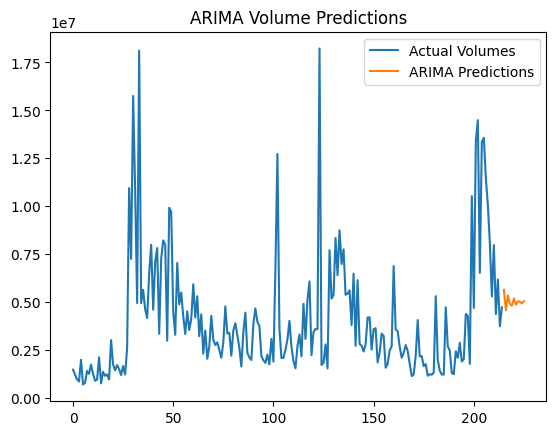

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Copy data
df = data

volumes = df['Volume']

model = ARIMA(volumes, order=(5, 1, 0))
model_fit = model.fit()

predictions = model_fit.predict(start=len(volumes), end=len(volumes) + 10)
# Predicts for the next 10 periods

plt.plot(volumes, label='Actual Volumes')
plt.plot(predictions, label='ARIMA Predictions')
plt.legend()
plt.title('ARIMA Volume Predictions')
plt.show()

# Bayesian



In [ ]:
import numpy as np

# Copy data
df = data

# Define a class to hold our prior belief
class Prior:
    def __init__(self, mean, variance):
        self.mean = mean
        self.variance = variance

# Define a class to hold our likelihood
class Likelihood:
    def __init__(self, mean, variance):
        self.mean = mean
        self.variance = variance

# Function to update our prior with new evidence
def bayesian_update(prior, likelihood):
    prior_variance_inv = 1.0 / prior.variance
    likelihood_variance_inv = 1.0 / likelihood.variance

    updated_variance = 1.0 / (prior_variance_inv + likelihood_variance_inv)
    updated_mean = updated_variance * (prior.mean * prior_variance_inv + likelihood.mean * likelihood_variance_inv)

    return Prior(mean=updated_mean, variance=updated_variance)

# Function to calculate mean and variance from records
def calculate_statistics(df, scale_factor=1):
    volumes = df['Volume'].astype(float) / scale_factor  # Scale the volumes
    mean = np.mean(volumes)
    variance = np.var(volumes)
    return mean, variance

# Function to apply Bayesian update using the DataFrame
def bayesian_with_volumes_df(df, scale_factor=1):
    try:
        # Sort DataFrame by index in descending order to get the most recent records at the top
        df = df.sort_index(ascending=False)

        # Calculate statistics for the prior using all records
        prior_mean, prior_variance = calculate_statistics(df, scale_factor)

        # Extract the most recent record as new evidence
        latest_record = df.iloc[0]  # Get the most recent row
        new_evidence_volume = float(latest_record['Volume']) / scale_factor  # Use iloc[0] for scalar value

        # For simplicity, use the prior variance as the variance for the new evidence
        new_evidence_variance = prior_variance

        # Define the prior and likelihood based on these values
        prior = Prior(mean=prior_mean, variance=prior_variance)
        likelihood = Likelihood(mean=new_evidence_volume, variance=new_evidence_variance)

        # Perform Bayesian update
        updated_prior = bayesian_update(prior, likelihood)

        # Ensure the values are float scalars when printing
        print(f"Updated Prior: mean = {updated_prior.mean:.2f}, variance = {updated_prior.variance:.2f}")

    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage with scaling (e.g., volumes in millions)
bayesian_with_volumes_df(df, scale_factor=1_000_000)

def print_legend():
    print("----- Legend for Updated Bayesian Results -----")
    print("Updated Mean: This is the new expected average trading volume after the Bayesian update, adjusted by the scaling factor. A higher mean suggests a higher expected volume of trades.")
    print("Updated Variance: This represents the uncertainty or variability around the updated mean. A lower variance indicates more confidence in the updated average, while a higher variance suggests more fluctuation is possible.")
    print("-----------------------------------------------\n")

# Call the function to print the legend
print_legend()




Updated Prior: mean = 4.38, variance = 4.87
----- Legend for Updated Bayesian Results -----
Updated Mean: This is the new expected average trading volume after the Bayesian update, adjusted by the scaling factor. A higher mean suggests a higher expected volume of trades.
Updated Variance: This represents the uncertainty or variability around the updated mean. A lower variance indicates more confidence in the updated average, while a higher variance suggests more fluctuation is possible.
-----------------------------------------------



# Box-Counting Dimension

https://www.intechopen.com/chapters/64463

Fractal Analysis of Time-Series Data Sets: Methods and Challenges

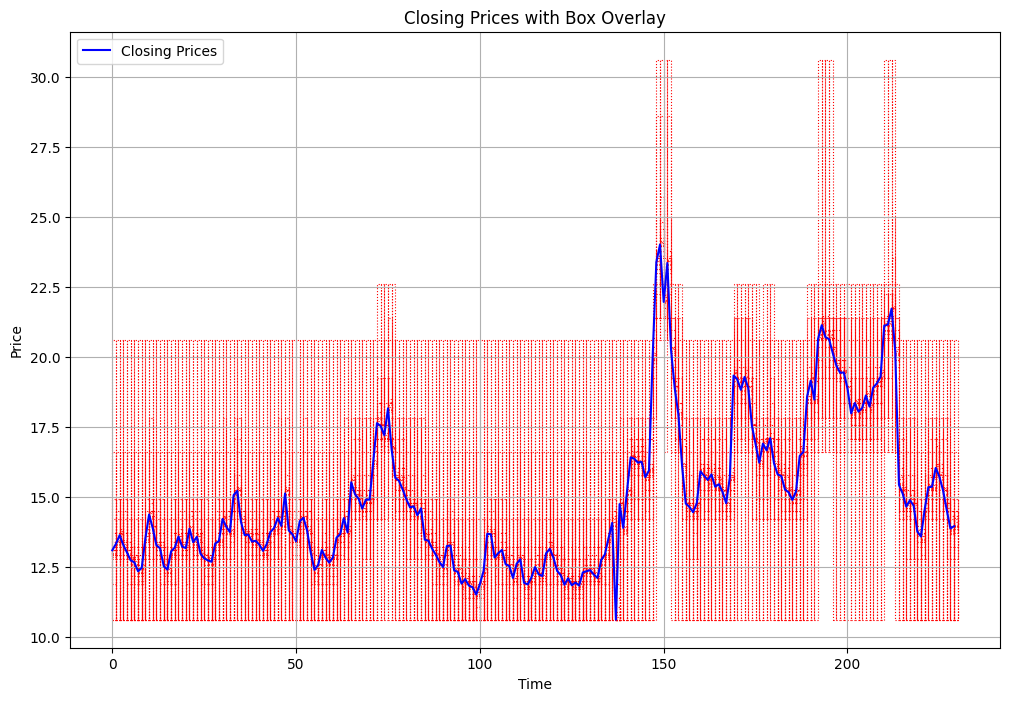

Box-Counting Dimension: 0.8267880976636773


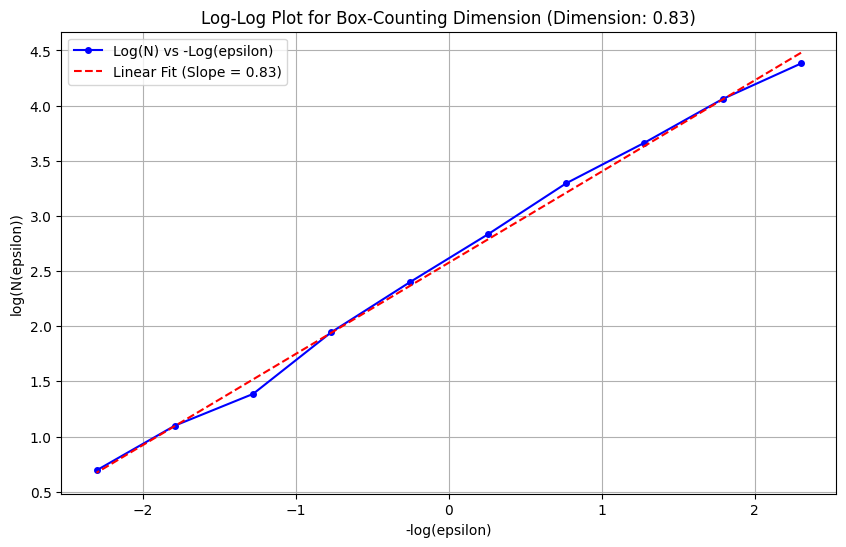

In [ ]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def box_counting_dimension_with_visualization(data, epsilons):
    """
    Calculate the box-counting dimension for a given time series and visualize the boxes.
    Parameters:
    - data: The 1D time series data.
    - epsilons: A list of box sizes (scales) to test.
    Returns:
    - The box-counting dimension, and arrays for log(epsilons) and log(N(epsilons)).
    """
    N = []  # Stores the number of boxes required for each epsilon
    min_val = min(data)
    max_val = max(data)

    plt.figure(figsize=(12, 8))
    plt.plot(range(len(data)), data, label="Closing Prices", color="blue")

    for epsilon in epsilons:
        count = 0
        box_edges = []
        active_boxes = []  # Store active boxes that intersect with data

        # Define the grid of boxes by moving across intervals of size epsilon
        for i in range(int((max_val - min_val) / epsilon) + 1):
            lower_bound = min_val + i * epsilon
            upper_bound = min_val + (i + 1) * epsilon

            # Check if there are any data points in the current box interval
            if any((data >= lower_bound) & (data < upper_bound)):
                count += 1
                box_edges.append((lower_bound, upper_bound))
                active_boxes.append((lower_bound, upper_bound))

        # Visualize the active boxes
        for lower_bound, upper_bound in active_boxes:
            for start_idx in range(len(data)):
                if data[start_idx] >= lower_bound and data[start_idx] < upper_bound:
                    rect = patches.Rectangle(
                        (start_idx, lower_bound),  # (x, y) position of the box
                        1,  # width of the box
                        upper_bound - lower_bound,  # height of the box
                        linewidth=0.8,
                        edgecolor="red",
                        facecolor="none",
                        linestyle="dotted"
                    )
                    plt.gca().add_patch(rect)

        N.append(count)

    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.title("Closing Prices with Box Overlay")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Log of N and epsilon for linear regression
    log_eps = -np.log(epsilons)
    log_N = np.log(N)

    # Calculate the slope of the line, which is the fractal dimension
    coeffs = np.polyfit(log_eps, log_N, 1)
    return coeffs[0], log_eps, log_N

# Load a sample time series data for Apple Inc.
df = data

# Use the closing prices for fractal analysis
time_series_data = df['Close'].dropna().values

# Define a range of box sizes (scales) for box-counting
epsilons = np.logspace(-1, 1, num=10)

# Calculate the box-counting dimension and visualize
dimension, log_eps, log_N = box_counting_dimension_with_visualization(time_series_data, epsilons)
print("Box-Counting Dimension:", dimension)

# Plot the log-log plot
plt.figure(figsize=(10, 6))

# Plot the log-log points
plt.plot(log_eps, log_N, 'bo-', markersize=4, label='Log(N) vs -Log(epsilon)')

# Overlay a linear fit line for visualization of the dimension
coeffs = np.polyfit(log_eps, log_N, 1)
plt.plot(log_eps, np.polyval(coeffs, log_eps), 'r--', label=f'Linear Fit (Slope = {coeffs[0]:.2f})')

# Add labels, title, and legend
plt.xlabel('-log(epsilon)')
plt.ylabel('log(N(epsilon))')
plt.title(f'Log-Log Plot for Box-Counting Dimension (Dimension: {dimension:.2f})')
plt.legend(loc='best')  # Automatically place the legend in the best position
plt.grid(True)
plt.show()


Box-Counting Dimension: 0.8539145698878695


<ipython-input-34-84da1e69bcfd>:47: RuntimeWarning: divide by zero encountered in log
  log_N = np.log([np.sum((time_series_data >= min(time_series_data) + i * epsilon) &


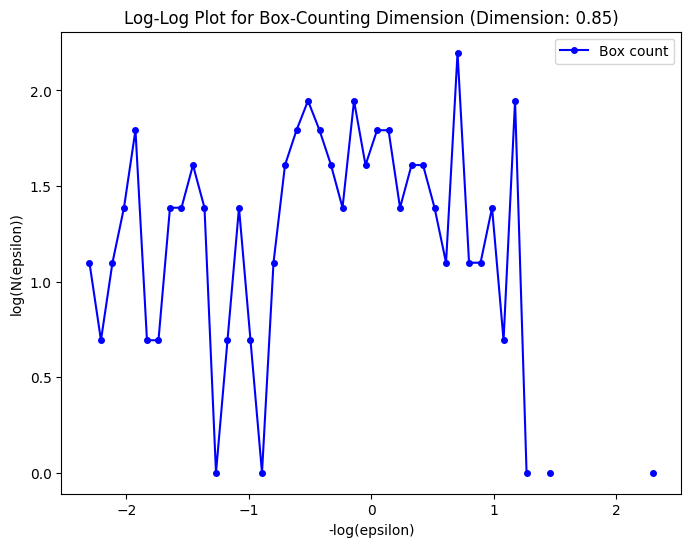

In [ ]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

def box_counting_dimension(data, epsilons):
    """
    Calculate the box-counting dimension for a given time series.
    Parameters:
    - data: The 1D time series data.
    - epsilons: A list of box sizes (scales) to test.
    """
    N = []  # Stores the number of boxes required for each epsilon
    for epsilon in epsilons:
        count = 0
        min_val = min(data)
        max_val = max(data)

        # Define the grid of boxes by moving across intervals of size epsilon
        for i in range(int((max_val - min_val) / epsilon) + 1):
            # Check if there are any data points in the current box interval
            if any((data >= min_val + i * epsilon) & (data < min_val + (i + 1) * epsilon)):
                count += 1
        N.append(count)

    # Convert N and epsilon to logarithmic values for fitting
    log_eps = -np.log(epsilons)
    log_N = np.log(N)

    # Calculate the slope of the line, which is the fractal dimension
    coeffs = np.polyfit(log_eps, log_N, 1)
    return coeffs[0]

df = data

# Use the closing prices for fractal analysis
time_series_data = df['Close'].dropna().values

# Define a range of box sizes (scales) for box-counting
epsilons = np.logspace(-1, 1, num=50)

# Calculate the box-counting dimension
dimension = box_counting_dimension(time_series_data, epsilons)
print("Box-Counting Dimension:", dimension)

# Log-log plot for visual verification
log_eps = -np.log(epsilons)
log_N = np.log([np.sum((time_series_data >= min(time_series_data) + i * epsilon) &
                       (time_series_data < min(time_series_data) + (i + 1) * epsilon))
                for epsilon in epsilons for i in range(int((max(time_series_data) - min(time_series_data)) / epsilon) + 1)])

plt.figure(figsize=(8, 6))
plt.plot(log_eps, log_N[:len(log_eps)], 'bo-', markersize=4, label='Box count')
plt.xlabel('-log(epsilon)')
plt.ylabel('log(N(epsilon))')
plt.title(f'Log-Log Plot for Box-Counting Dimension (Dimension: {dimension:.2f})')
plt.legend()
plt.show()

# Chua's Circuit - Chaotic Algorithm

Need to revise

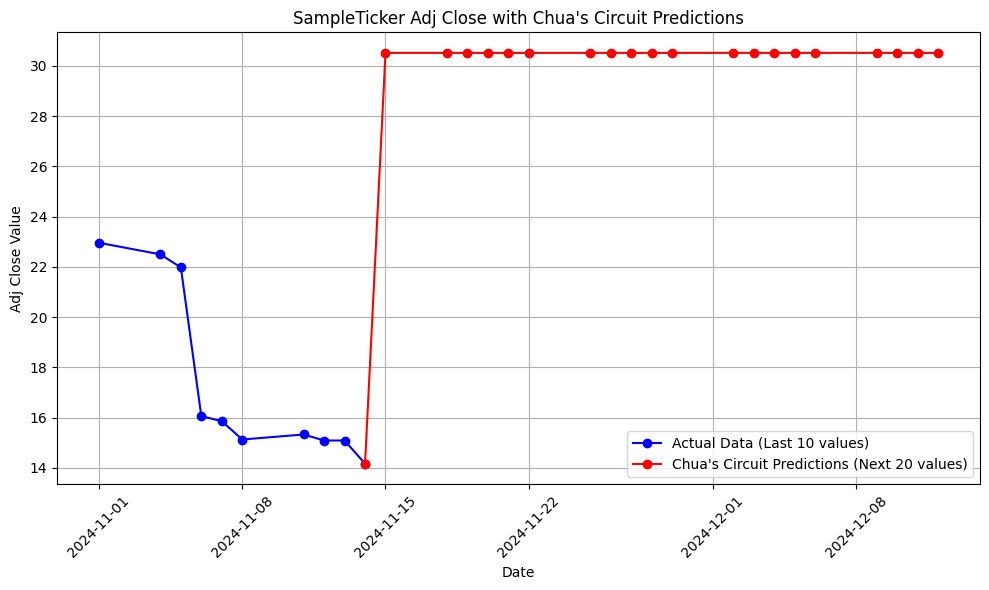

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp

# Copy data
df = data

# Chua's circuit parameters
alpha = 15
beta = 28
# Piecewise linear function for Chua's diode
def f(x):
    # Example piecewise linear function
    m1, m2 = -1, 1
    return m1 * x + (m2 - m1) * (x + 1) * (x > -1) * (x < 1)

# Check if df has at least 10 entries for the starting points
if len(df) >= 10:
    # Extract the last 10 `Adj Close` values as the basis for the time series
    last_10_values = df['Adj Close'].iloc[-10:].tolist()
    initial_value = last_10_values[-1]
else:
    print("DataFrame does not contain enough data points.")
    last_10_values = [1.0] * 10  # Fallback values if not enough data
    initial_value = last_10_values[-1]

# Number of new values to predict with Chua's circuit
num_predictions = 20

# Time span for integration
t_span = (0, 100)
time_eval = np.linspace(t_span[0], t_span[1], 1000)  # Time range for integration

# Define the Chua's circuit equations
def chua(t, state):
    x, y, z = state
    dxdt = alpha * (y - x - f(x))
    dydt = x - y + z
    dzdt = -beta * y
    return [dxdt, dydt, dzdt]

# Use solve_ivp to integrate Chua's circuit equations
initial_state = [initial_value, 0.0, 0.0]  # Assuming y and z start at 0
sol = solve_ivp(chua, t_span, initial_state, t_eval=time_eval)

# Extract the predicted values (using x values for demonstration)
predicted_values = sol.y[0][-num_predictions:]  # Take the last 20 predicted x values

# Combine last 10 actual values with the 20 predictions
full_series = last_10_values + predicted_values.tolist()

# Generate corresponding dates for the time series plot
# Assuming `Date` column exists in `df`
dates = pd.to_datetime(df['Date'].iloc[-10:].tolist())  # Last 10 dates from df
future_dates = pd.date_range(dates[-1] + pd.Timedelta(days=1), periods=num_predictions, freq='B')  # Business days for predictions
all_dates = dates.tolist() + future_dates.tolist()

# Plot the time series chart
plt.figure(figsize=(10, 6))
plt.plot(all_dates[:10], full_series[:10], 'bo-', label="Actual Data (Last 10 values)")
plt.plot(all_dates[9:], full_series[9:], 'ro-', label="Chua's Circuit Predictions (Next 20 values)")
plt.xlabel("Date")
plt.ylabel("Adj Close Value")
plt.title(f"{ticker} Adj Close with Chua's Circuit Predictions")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Duffing Oscillator - Chaotic Algorithm

Need to revise

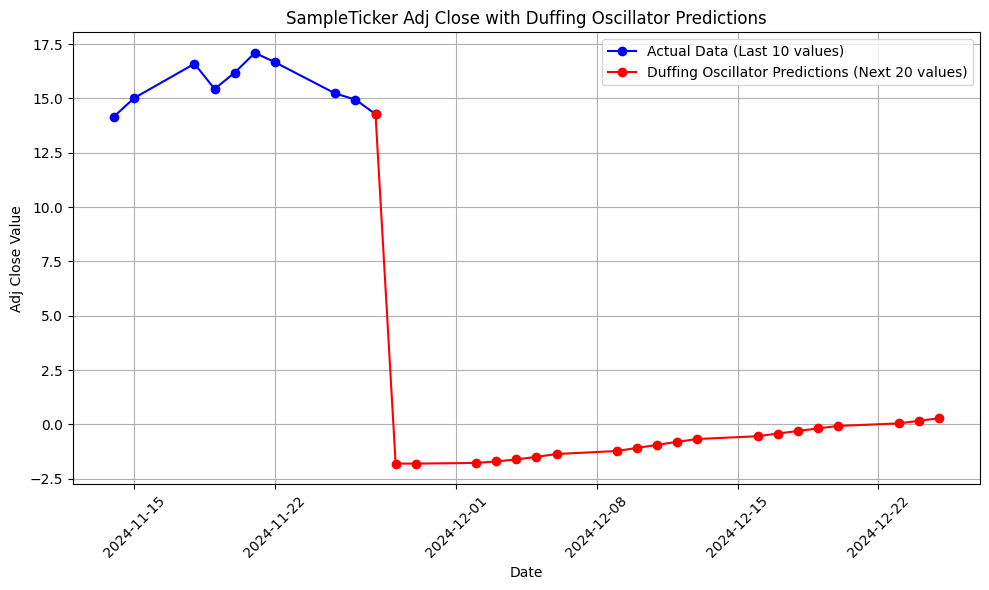

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp

# Copy data
df = data

# Duffing oscillator parameters
delta = 0.2    # Damping coefficient
alpha = -1.0   # Linear stiffness
beta = 1.0     # Nonlinear stiffness
gamma = 0.5    # Forcing amplitude
omega = 1.0    # Forcing frequency

# Check if df has at least 10 entries for the starting points
if len(df) >= 10:
    # Extract the last 10 `Adj Close` values as the basis for the time series
    last_10_values = df['Adj Close'].iloc[-10:].tolist()
    initial_value = last_10_values[-1]
else:
    print("DataFrame does not contain enough data points.")
    last_10_values = [1.0] * 10  # Fallback values if not enough data
    initial_value = last_10_values[-1]

# Number of new values to predict with the Duffing oscillator
num_predictions = 20

# Time span for integration
t_span = (0, 100)
time_eval = np.linspace(t_span[0], t_span[1], 1000)  # Time range for integration

# Define the Duffing oscillator equations
def duffing(t, state):
    x, v = state  # state = [displacement, velocity]
    dxdt = v
    dvdt = -delta * v - alpha * x - beta * x**3 + gamma * np.cos(omega * t)
    return [dxdt, dvdt]

# Use solve_ivp to integrate the Duffing oscillator equations
initial_state = [initial_value, 0.0]  # Assuming velocity starts at 0
sol = solve_ivp(duffing, t_span, initial_state, t_eval=time_eval)

# Extract the predicted values (using x values for demonstration)
predicted_values = sol.y[0][-num_predictions:]  # Take the last 20 predicted x values

# Combine last 10 actual values with the 20 predictions
full_series = last_10_values + predicted_values.tolist()

# Generate corresponding dates for the time series plot
# Assuming `Date` column exists in `df`
dates = pd.to_datetime(df['Date'].iloc[-10:].tolist())  # Last 10 dates from df
future_dates = pd.date_range(dates[-1] + pd.Timedelta(days=1), periods=num_predictions, freq='B')  # Business days for predictions
all_dates = dates.tolist() + future_dates.tolist()

# Plot the time series chart
plt.figure(figsize=(10, 6))
plt.plot(all_dates[:10], full_series[:10], 'bo-', label="Actual Data (Last 10 values)")
plt.plot(all_dates[9:], full_series[9:], 'ro-', label="Duffing Oscillator Predictions (Next 20 values)")
plt.xlabel("Date")
plt.ylabel("Adj Close Value")
plt.title(f"{ticker} Adj Close with Duffing Oscillator Predictions")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Echo State Network

In [ ]:
pip install git+https://github.com/cknd/pyESN #pip install pyEsn #

  Cloning https://github.com/cknd/pyESN to /tmp/pip-req-build-rtachiwy
  Running command git clone --filter=blob:none --quiet https://github.com/cknd/pyESN /tmp/pip-req-build-rtachiwy
  Resolved https://github.com/cknd/pyESN to commit de294b637450abc072d1e0f49fcca7355450482d
ERROR: git+https://github.com/cknd/pyESN does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


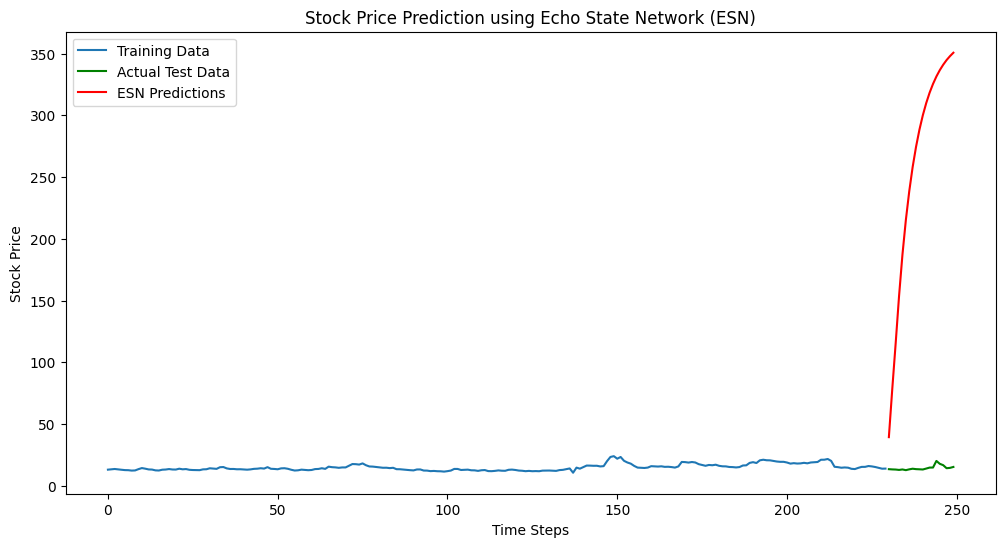

In [ ]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
# from pyESN import ESN

import numpy as np


def correct_dimensions(s, targetlength):
    """checks the dimensionality of some numeric argument s, broadcasts it
       to the specified length if possible.

    Args:
        s: None, scalar or 1D array
        targetlength: expected length of s

    Returns:
        None if s is None, else numpy vector of length targetlength
    """
    if s is not None:
        s = np.array(s)
        if s.ndim == 0:
            s = np.array([s] * targetlength)
        elif s.ndim == 1:
            if not len(s) == targetlength:
                raise ValueError("arg must have length " + str(targetlength))
        else:
            raise ValueError("Invalid argument")
    return s


def identity(x):
    return x


class ESN():

    def __init__(self, n_inputs, n_outputs, n_reservoir=200,
                 spectral_radius=0.95, sparsity=0, noise=0.001, input_shift=None,
                 input_scaling=None, teacher_forcing=True, feedback_scaling=None,
                 teacher_scaling=None, teacher_shift=None,
                 out_activation=identity, inverse_out_activation=identity,
                 random_state=None, silent=True):
        """
        Args:
            n_inputs: nr of input dimensions
            n_outputs: nr of output dimensions
            n_reservoir: nr of reservoir neurons
            spectral_radius: spectral radius of the recurrent weight matrix
            sparsity: proportion of recurrent weights set to zero
            noise: noise added to each neuron (regularization)
            input_shift: scalar or vector of length n_inputs to add to each
                        input dimension before feeding it to the network.
            input_scaling: scalar or vector of length n_inputs to multiply
                        with each input dimension before feeding it to the netw.
            teacher_forcing: if True, feed the target back into output units
            teacher_scaling: factor applied to the target signal
            teacher_shift: additive term applied to the target signal
            out_activation: output activation function (applied to the readout)
            inverse_out_activation: inverse of the output activation function
            random_state: positive integer seed, np.rand.RandomState object,
                          or None to use numpy's builting RandomState.
            silent: supress messages
        """
        # check for proper dimensionality of all arguments and write them down.
        self.n_inputs = n_inputs
        self.n_reservoir = n_reservoir
        self.n_outputs = n_outputs
        self.spectral_radius = spectral_radius
        self.sparsity = sparsity
        self.noise = noise
        self.input_shift = correct_dimensions(input_shift, n_inputs)
        self.input_scaling = correct_dimensions(input_scaling, n_inputs)

        self.teacher_scaling = teacher_scaling
        self.teacher_shift = teacher_shift

        self.out_activation = out_activation
        self.inverse_out_activation = inverse_out_activation
        self.random_state = random_state

        # the given random_state might be either an actual RandomState object,
        # a seed or None (in which case we use numpy's builtin RandomState)
        if isinstance(random_state, np.random.RandomState):
            self.random_state_ = random_state
        elif random_state:
            try:
                self.random_state_ = np.random.RandomState(random_state)
            except TypeError as e:
                raise Exception("Invalid seed: " + str(e))
        else:
            self.random_state_ = np.random.mtrand._rand

        self.teacher_forcing = teacher_forcing
        self.silent = silent
        self.initweights()

    def initweights(self):
        # initialize recurrent weights:
        # begin with a random matrix centered around zero:
        W = self.random_state_.rand(self.n_reservoir, self.n_reservoir) - 0.5
        # delete the fraction of connections given by (self.sparsity):
        W[self.random_state_.rand(*W.shape) < self.sparsity] = 0
        # compute the spectral radius of these weights:
        radius = np.max(np.abs(np.linalg.eigvals(W)))
        # rescale them to reach the requested spectral radius:
        self.W = W * (self.spectral_radius / radius)

        # random input weights:
        self.W_in = self.random_state_.rand(
            self.n_reservoir, self.n_inputs) * 2 - 1
        # random feedback (teacher forcing) weights:
        self.W_feedb = self.random_state_.rand(
            self.n_reservoir, self.n_outputs) * 2 - 1

    def _update(self, state, input_pattern, output_pattern):
        """performs one update step.

        i.e., computes the next network state by applying the recurrent weights
        to the last state & and feeding in the current input and output patterns
        """
        if self.teacher_forcing:
            preactivation = (np.dot(self.W, state)
                             + np.dot(self.W_in, input_pattern)
                             + np.dot(self.W_feedb, output_pattern))
        else:
            preactivation = (np.dot(self.W, state)
                             + np.dot(self.W_in, input_pattern))
        return (np.tanh(preactivation)
                + self.noise * (self.random_state_.rand(self.n_reservoir) - 0.5))

    def _scale_inputs(self, inputs):
        """for each input dimension j: multiplies by the j'th entry in the
        input_scaling argument, then adds the j'th entry of the input_shift
        argument."""
        if self.input_scaling is not None:
            inputs = np.dot(inputs, np.diag(self.input_scaling))
        if self.input_shift is not None:
            inputs = inputs + self.input_shift
        return inputs

    def _scale_teacher(self, teacher):
        """multiplies the teacher/target signal by the teacher_scaling argument,
        then adds the teacher_shift argument to it."""
        if self.teacher_scaling is not None:
            teacher = teacher * self.teacher_scaling
        if self.teacher_shift is not None:
            teacher = teacher + self.teacher_shift
        return teacher

    def _unscale_teacher(self, teacher_scaled):
        """inverse operation of the _scale_teacher method."""
        if self.teacher_shift is not None:
            teacher_scaled = teacher_scaled - self.teacher_shift
        if self.teacher_scaling is not None:
            teacher_scaled = teacher_scaled / self.teacher_scaling
        return teacher_scaled

    def fit(self, inputs, outputs, inspect=False):
        """
        Collect the network's reaction to training data, train readout weights.

        Args:
            inputs: array of dimensions (N_training_samples x n_inputs)
            outputs: array of dimension (N_training_samples x n_outputs)
            inspect: show a visualisation of the collected reservoir states

        Returns:
            the network's output on the training data, using the trained weights
        """
        # transform any vectors of shape (x,) into vectors of shape (x,1):
        if inputs.ndim < 2:
            inputs = np.reshape(inputs, (len(inputs), -1))
        if outputs.ndim < 2:
            outputs = np.reshape(outputs, (len(outputs), -1))
        # transform input and teacher signal:
        inputs_scaled = self._scale_inputs(inputs)
        teachers_scaled = self._scale_teacher(outputs)

        if not self.silent:
            print("harvesting states...")
        # step the reservoir through the given input,output pairs:
        states = np.zeros((inputs.shape[0], self.n_reservoir))
        for n in range(1, inputs.shape[0]):
            states[n, :] = self._update(states[n - 1], inputs_scaled[n, :],
                                        teachers_scaled[n - 1, :])

        # learn the weights, i.e. find the linear combination of collected
        # network states that is closest to the target output
        if not self.silent:
            print("fitting...")
        # we'll disregard the first few states:
        transient = min(int(inputs.shape[1] / 10), 100)
        # include the raw inputs:
        extended_states = np.hstack((states, inputs_scaled))
        # Solve for W_out:
        self.W_out = np.dot(np.linalg.pinv(extended_states[transient:, :]),
                            self.inverse_out_activation(teachers_scaled[transient:, :])).T

        # remember the last state for later:
        self.laststate = states[-1, :]
        self.lastinput = inputs[-1, :]
        self.lastoutput = teachers_scaled[-1, :]

        # optionally visualize the collected states
        if inspect:
            from matplotlib import pyplot as plt
            # (^-- we depend on matplotlib only if this option is used)
            plt.figure(
                figsize=(states.shape[0] * 0.0025, states.shape[1] * 0.01))
            plt.imshow(extended_states.T, aspect='auto',
                       interpolation='nearest')
            plt.colorbar()

        if not self.silent:
            print("training error:")
        # apply learned weights to the collected states:
        pred_train = self._unscale_teacher(self.out_activation(
            np.dot(extended_states, self.W_out.T)))
        if not self.silent:
            print(np.sqrt(np.mean((pred_train - outputs)**2)))
        return pred_train

    def predict(self, inputs, continuation=True):
        """
        Apply the learned weights to the network's reactions to new input.

        Args:
            inputs: array of dimensions (N_test_samples x n_inputs)
            continuation: if True, start the network from the last training state

        Returns:
            Array of output activations
        """
        if inputs.ndim < 2:
            inputs = np.reshape(inputs, (len(inputs), -1))
        n_samples = inputs.shape[0]

        if continuation:
            laststate = self.laststate
            lastinput = self.lastinput
            lastoutput = self.lastoutput
        else:
            laststate = np.zeros(self.n_reservoir)
            lastinput = np.zeros(self.n_inputs)
            lastoutput = np.zeros(self.n_outputs)

        inputs = np.vstack([lastinput, self._scale_inputs(inputs)])
        states = np.vstack(
            [laststate, np.zeros((n_samples, self.n_reservoir))])
        outputs = np.vstack(
            [lastoutput, np.zeros((n_samples, self.n_outputs))])

        for n in range(n_samples):
            states[
                n + 1, :] = self._update(states[n, :], inputs[n + 1, :], outputs[n, :])
            outputs[n + 1, :] = self.out_activation(np.dot(self.W_out,
                                                           np.concatenate([states[n + 1, :], inputs[n + 1, :]])))

        return self._unscale_teacher(self.out_activation(outputs[1:]))

df = data

time_series_data = df['Close'].dropna().values

# Normalize the data for better ESN performance
data_mean = np.mean(time_series_data)
data_std = np.std(time_series_data)
normalized_data = (time_series_data - data_mean) / data_std

# Split into train and test sets
train_len = len(normalized_data) - 20  # Leave the last 20 values for testing
train_data = normalized_data[:train_len]
test_data = normalized_data[train_len:]

# Adjusted ESN initialization with different parameters
esn = ESN(
    n_inputs=1,
    n_outputs=1,
    n_reservoir=298,  # Adjust the number of neurons to avoid overfitting
    spectral_radius=1.37,  # Slightly reduce the spectral radius
    sparsity=0.1,  # Increase sparsity to avoid overfitting
    #noise=0.01,  # Introduce noise for regularization
    #teacher_forcing=True,  # Keep teacher forcing to help with training
    random_state=42
)

# Train the ESN on the training data
esn.fit(train_data[:-1].reshape(-1, 1), train_data[1:].reshape(-1, 1))

# Predict the next 20 values
predicted_values = []
last_value = train_data[-1]

for _ in range(20):
    prediction = esn.predict(np.array(last_value).reshape(1, -1))[0][0]
    predicted_values.append(prediction)
    last_value = prediction  # Feed back the last prediction

# Rescale the predictions to the original scale
predicted_values = np.array(predicted_values) * data_std + data_mean
test_data_rescaled = test_data * data_std + data_mean
train_data_rescaled = train_data * data_std + data_mean

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(range(len(train_data_rescaled)), train_data_rescaled, label="Training Data")
plt.plot(range(len(train_data_rescaled), len(train_data_rescaled) + len(test_data_rescaled)), test_data_rescaled, label="Actual Test Data", color="green")
plt.plot(range(len(train_data_rescaled), len(train_data_rescaled) + len(predicted_values)), predicted_values, label="ESN Predictions", color="red")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.title("Stock Price Prediction using Echo State Network (ESN)")
plt.show()





# Fractional Gaussian Noise (fGn)

Simulated fGn: [ 1.45108167  0.60801422  0.34869845 -0.29630364 -0.20400379  0.0315656
 -0.40641638  0.88927677  0.09917269  0.4363731  -1.06463164  1.61519319
  0.03845807  0.68300842  0.99225813  1.35301101  0.48170472  1.2671229
  0.59178076  1.83215094 -0.3444742  -2.25624064  0.77553304  0.98560914
  0.22396062  1.26407469 -0.0629715  -0.64246145  0.46752502 -0.03956474
 -0.01789844 -0.25033661  1.4129029  -0.2584493   0.80650843  1.35962335
  0.80501926  0.08344223  0.54593905 -0.77306694  1.18169547  2.06180331
  0.59985399  0.76568671 -0.95602086  0.46787438 -0.86712637  0.15316995
  1.82500941 -0.26412445  0.26733095 -0.41031818 -0.58854281 -0.13541172
  1.27415695  0.25111188 -0.97318732 -0.88652384 -1.78336497 -1.19374855
 -2.52584587 -1.2431114  -1.56488164 -0.2626402  -0.98758165 -0.66543159
 -0.19656508 -0.25037718 -0.49373399 -0.85465752 -0.69077379 -1.05856239
 -0.50242469 -1.84122022 -0.39461349  0.81868037  0.90964159 -1.0180908
  0.61556182 -0.93529599 -0.71088551  0

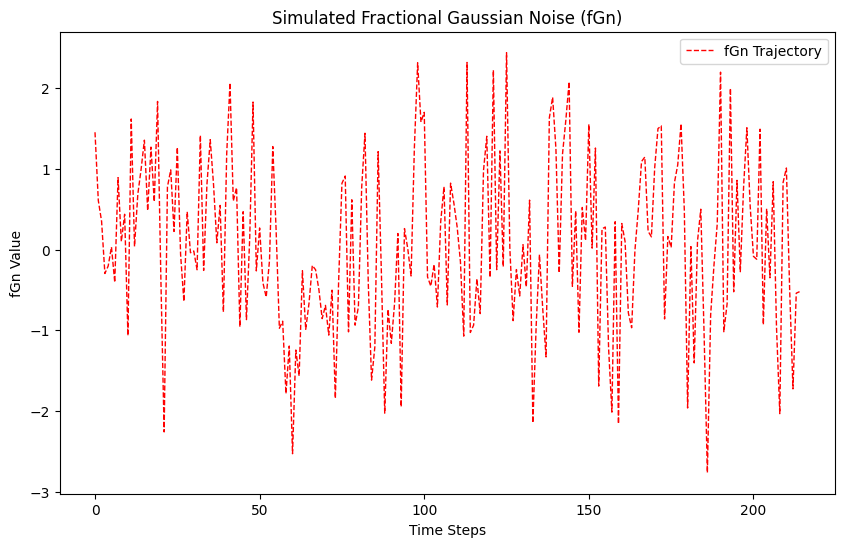

In [ ]:
import numpy as np
from scipy.linalg import cholesky

# Copy data
df = data

def generate_covariance_matrix(hurst, size):
    cov_matrix = np.zeros((size, size))

    for i in range(size):
        for j in range(size):
            cov_matrix[i, j] = 0.5 * ((i + 1) ** (2 * hurst) + (j + 1) ** (2 * hurst) - abs(i - j) ** (2 * hurst))

    return cov_matrix

def hurst_exponent(volumes):
    n = len(volumes)
    mean_vol = np.mean(volumes)

    rs = np.cumsum(volumes - mean_vol)
    range_rs = np.max(rs) - np.min(rs)
    stdev_vol = np.std(volumes)

    hurst_exp = np.log2(range_rs / stdev_vol) / np.log2(n)

    return hurst_exp

def simulate_fbm(hurst, length):
    cov_matrix = generate_covariance_matrix(hurst, length)
    cholesky_decomp = cholesky(cov_matrix, lower=True)
    z = np.random.normal(size=(length,))

    fbm_series = cholesky_decomp.dot(z)
    return fbm_series

def simulate_fgn(hurst, length):
    fbm_series = simulate_fbm(hurst, length + 1)
    fgn_series = np.diff(fbm_series)
    return fgn_series

# Calculate Hurst Exponent
hurst = hurst_exponent(np.array(df['Volume']))

# Simulate fGn
fgn_series = simulate_fgn(hurst, len(df['Volume']))
print(f"Simulated fGn: {fgn_series}")

plt.figure(figsize=(10, 6))

# Plot fGn
plt.plot(fgn_series, label='fGn Trajectory', color='r', linestyle='--', linewidth=1)
plt.xlabel('Time Steps')
plt.ylabel('fGn Value')
plt.title('Simulated Fractional Gaussian Noise (fGn)')
plt.legend()
plt.show()


# Fractional Lévy Stable Motion (FLSM)

Simulated FLSM: [ 6.86239927e-01  1.79127865e+00 -6.41336871e-01 -1.47244710e+00
 -1.79818781e+00 -5.10312930e-02  3.75068528e-01  3.85078403e+00
  5.30358052e+00  4.46241113e+00  5.72833271e+00  6.62492117e+00
  7.13227097e+00  8.58617344e+00  8.87215657e+00  1.01020296e+01
  8.31326131e+00  9.18045133e+00  5.77685016e+00  2.32528680e-01
 -8.69025817e-01 -1.52305212e+00  2.95289770e-01  3.47988912e+00
  5.87159430e+00  7.12480622e+00  5.46680684e+00  3.96853653e+00
  1.24230384e+01  1.44665320e+01  1.60871547e+01  1.72018305e+01
  2.15062007e+01  2.38905546e+01  8.48594255e+01  9.53669022e+01
  9.98161584e+01  1.01599054e+02  1.04572288e+02  1.07612543e+02
  1.10585755e+02  1.14533178e+02  1.11209392e+02  1.11276896e+02
  1.12354854e+02  1.11616117e+02  1.13088717e+02  1.11146869e+02
  1.11861266e+02  1.12536395e+02  1.12459807e+02  1.13230416e+02
 -4.84894345e+02 -5.88777554e+02 -6.34477291e+02 -6.63238991e+02
 -6.86986103e+02 -7.07785839e+02 -7.20700637e+02 -7.33320841e+02
 -7.47213

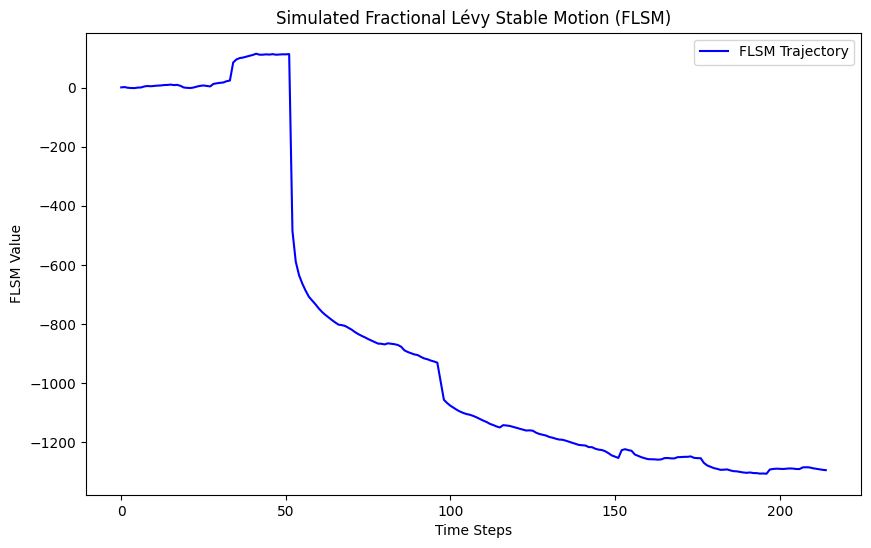

In [ ]:
import numpy as np
from scipy.linalg import cholesky

# Copy data
df = data

def generate_covariance_matrix(hurst, size):
    cov_matrix = np.zeros((size, size))

    for i in range(size):
        for j in range(size):
            cov_matrix[i, j] = 0.5 * ((i + 1) ** (2 * hurst) + (j + 1) ** (2 * hurst) - abs(i - j) ** (2 * hurst))

    return cov_matrix

def hurst_exponent(volumes):
    n = len(volumes)
    mean_vol = np.mean(volumes)

    rs = np.cumsum(volumes - mean_vol)
    range_rs = np.max(rs) - np.min(rs)
    stdev_vol = np.std(volumes)

    hurst_exp = np.log2(range_rs / stdev_vol) / np.log2(n)

    return hurst_exp

def levy_stable(alpha, beta, sigma, mu):
    u = np.random.uniform(-np.pi/2, np.pi/2)
    w = np.random.normal()

    if alpha == 1.0:
        return mu + beta * np.tan(np.pi / 2 + beta * u) * sigma * np.log(np.pi / 2 + beta * u)

    zeta = beta * np.tan(np.pi / 2 * alpha)
    term1 = (1 + zeta ** 2) ** 0.5
    term2 = np.tan(alpha * u)
    term3 = np.log(1 + zeta * term2)
    term4 = (1 / alpha) * (term1 * term2 - zeta * (w - term3))

    return mu + sigma * term4

def simulate_flm(hurst, length, alpha):
    cov_matrix = generate_covariance_matrix(hurst, length)
    cholesky_decomp = cholesky(cov_matrix, lower=True)

    z = [levy_stable(alpha, 0.0, 1.0, 0.0) for _ in range(length)]
    z_matrix = np.array(z)

    flm_series = cholesky_decomp.dot(z_matrix)
    return flm_series

# Calculate Hurst Exponent
hurst = hurst_exponent(np.array(df['Volume']))

# Simulate FLSM
flm_series = simulate_flm(hurst, len(df['Volume']), alpha=1.5)
print(f"Simulated FLSM: {flm_series}")

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(flm_series, label='FLSM Trajectory', color='b')

# Add labels and title
plt.xlabel('Time Steps')
plt.ylabel('FLSM Value')
plt.title('Simulated Fractional Lévy Stable Motion (FLSM)')
plt.legend()

# Display the plot
plt.show()

# Fuzzy Logic

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.5 MB/s eta 0:00:00


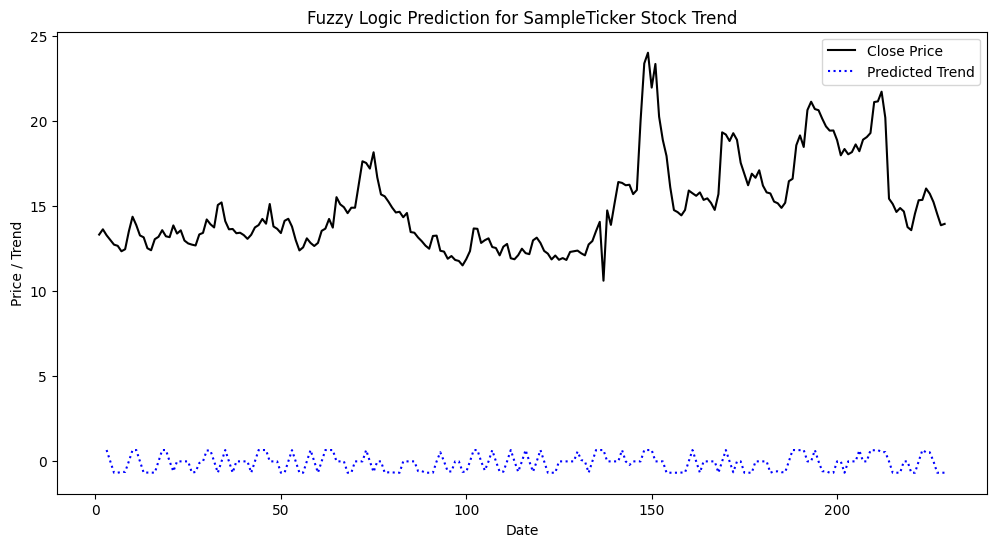

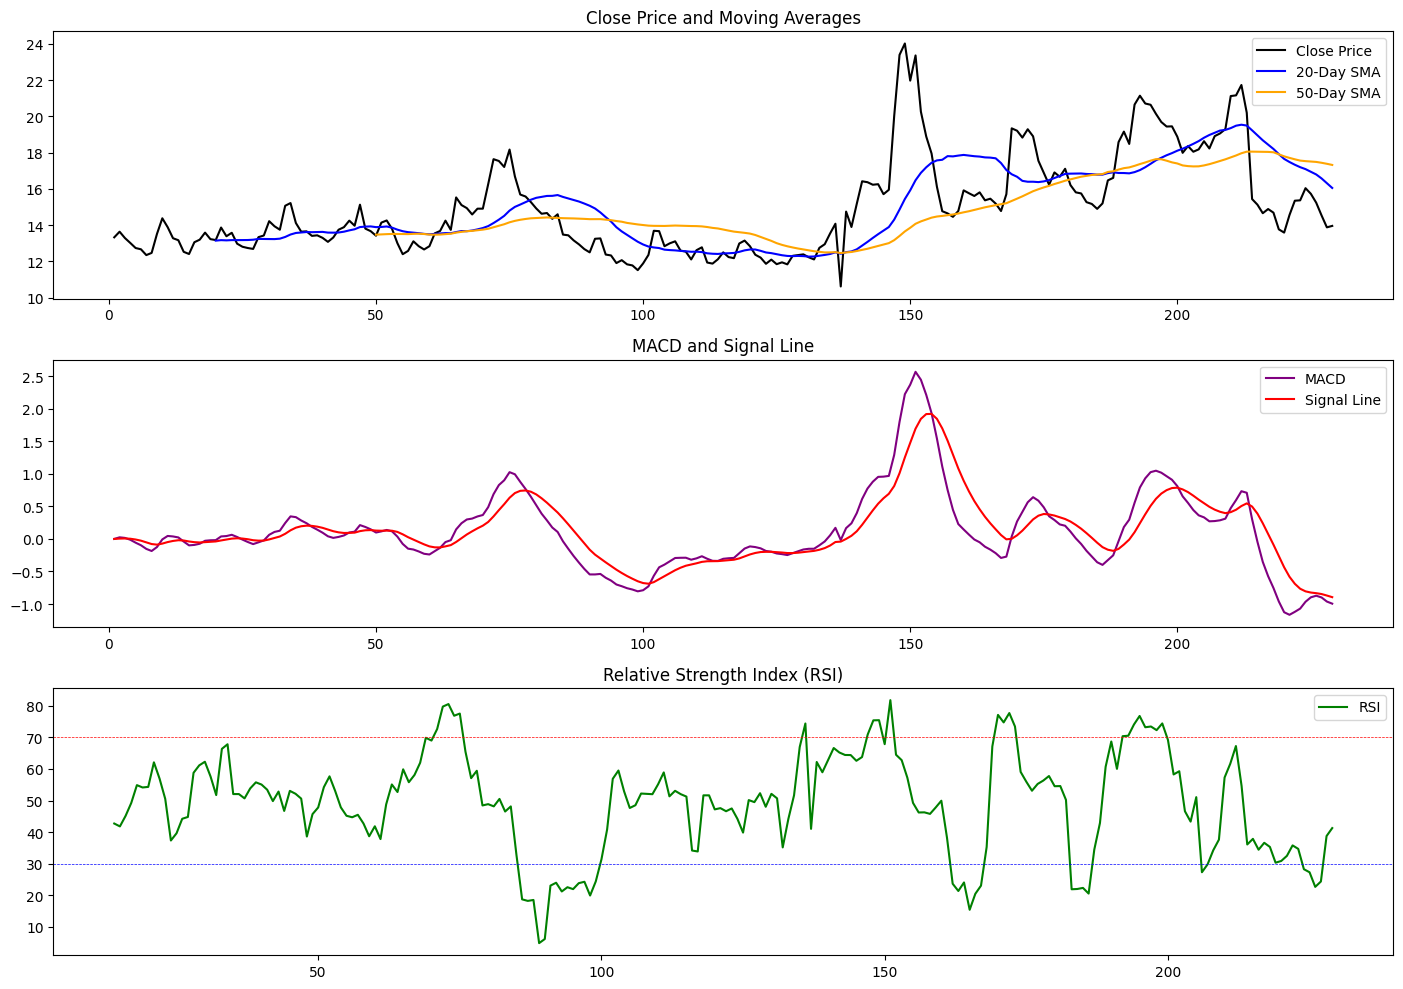

In [ ]:
import yfinance as yf
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import matplotlib.pyplot as plt

# Copy data
df = data

df = df[['Date', 'Close']]
df = df.dropna()

# Calculate daily price change percentages
df['Change'] = df['Close'].pct_change() * 100
df = df.dropna()

# Fuzzy variables for the last two days' price changes
change_day1 = ctrl.Antecedent(np.arange(-5, 5, 0.1), 'change_day1')
change_day2 = ctrl.Antecedent(np.arange(-5, 5, 0.1), 'change_day2')
trend = ctrl.Consequent(np.arange(-1, 2, 1), 'trend')

# Define fuzzy membership functions for the inputs
change_day1['decrease'] = fuzz.trapmf(change_day1.universe, [-5, -5, -1, 0])
change_day1['stable'] = fuzz.trimf(change_day1.universe, [-1, 0, 1])
change_day1['increase'] = fuzz.trapmf(change_day1.universe, [0, 1, 5, 5])

change_day2['decrease'] = fuzz.trapmf(change_day2.universe, [-5, -5, -1, 0])
change_day2['stable'] = fuzz.trimf(change_day2.universe, [-1, 0, 1])
change_day2['increase'] = fuzz.trapmf(change_day2.universe, [0, 1, 5, 5])

# Define fuzzy membership functions for the output
trend['decrease'] = fuzz.trimf(trend.universe, [-1, -1, 0])
trend['stable'] = fuzz.trimf(trend.universe, [-1, 0, 1])
trend['increase'] = fuzz.trimf(trend.universe, [0, 1, 1])

rule1 = ctrl.Rule(change_day1['decrease'] & change_day2['decrease'], trend['decrease'])
rule2 = ctrl.Rule(change_day1['stable'] & change_day2['stable'], trend['stable'])
rule3 = ctrl.Rule(change_day1['increase'] & change_day2['increase'], trend['increase'])
rule4 = ctrl.Rule(change_day1['decrease'] & change_day2['increase'], trend['stable'])
rule5 = ctrl.Rule(change_day1['increase'] & change_day2['decrease'], trend['stable'])

# Create the control system and simulation
trend_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
trend_sim = ctrl.ControlSystemSimulation(trend_ctrl)

# Predict trends for the last few days
predictions = []
for i in range(2, len(df)):
    trend_sim.input['change_day1'] = df['Change'].iloc[i-1]
    trend_sim.input['change_day2'] = df['Change'].iloc[i-2]
    trend_sim.compute()
    predictions.append(trend_sim.output['trend'])

# Add predictions to the DataFrame
df['Predicted_Trend'] = [np.nan, np.nan] + predictions  # Align with input data

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label="Close Price", color="black")
plt.plot(df['Predicted_Trend'], label="Predicted Trend", color="blue", linestyle="dotted")
plt.xlabel("Date")
plt.ylabel("Price / Trend")
plt.title(f"Fuzzy Logic Prediction for {ticker} Stock Trend")
plt.legend()
plt.show()

# Assuming `df` is your DataFrame with a 'Close' column
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

# RSI Calculation
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

# Plotting
plt.figure(figsize=(14, 10))

# Plot Close Price with Moving Averages
plt.subplot(3, 1, 1)
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(df['SMA_20'], label='20-Day SMA', color='blue')
plt.plot(df['SMA_50'], label='50-Day SMA', color='orange')
plt.title("Close Price and Moving Averages")
plt.legend()

# Plot MACD
plt.subplot(3, 1, 2)
plt.plot(df['MACD'], label='MACD', color='purple')
plt.plot(df['Signal_Line'], label='Signal Line', color='red')
plt.title("MACD and Signal Line")
plt.legend()

# Plot RSI
plt.subplot(3, 1, 3)
plt.plot(df['RSI'], label='RSI', color='green')
plt.axhline(70, color='red', linestyle='--', lw=0.5)
plt.axhline(30, color='blue', linestyle='--', lw=0.5)
plt.title("Relative Strength Index (RSI)")
plt.legend()

plt.tight_layout()
plt.show()

# Heatmap

In [ ]:
!pip install matplotlib numpy

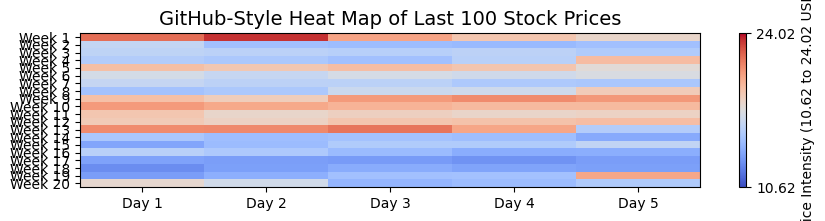

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Copy data
df = data

# Load the data (replace with your actual DataFrame or CSV file path)

# Extract the last 100 'Close' prices
last_100_close_prices = df['Close'].tail(100).tolist()

# Normalize the prices for the heatmap
min_val, max_val = df['Close'].min(), df['Close'].max()
normalized_prices = [(price - min_val) / (max_val - min_val) for price in last_100_close_prices]

# Reshape the data into a 20x5 grid
price_grid = np.array(normalized_prices).reshape(20, 5)

# Create the heatmap
plt.figure(figsize=(10, 2))
plt.imshow(price_grid, cmap='coolwarm', aspect='auto', vmin=0, vmax=1)

# Add colorbar with the original price scale
cbar = plt.colorbar(label=f'Price Intensity ({min_val:.2f} to {max_val:.2f} USD)')
cbar.set_ticks([0, 1])
cbar.set_ticklabels([f'{min_val:.2f}', f'{max_val:.2f}'])

# Set labels
plt.title('GitHub-Style Heat Map of Last 100 Stock Prices', fontsize=14)
plt.xticks(range(5), labels=[f'Day {i+1}' for i in range(5)])
plt.yticks(range(20), labels=[f'Week {i+1}' for i in range(20)])

# Show the heatmap
plt.show()


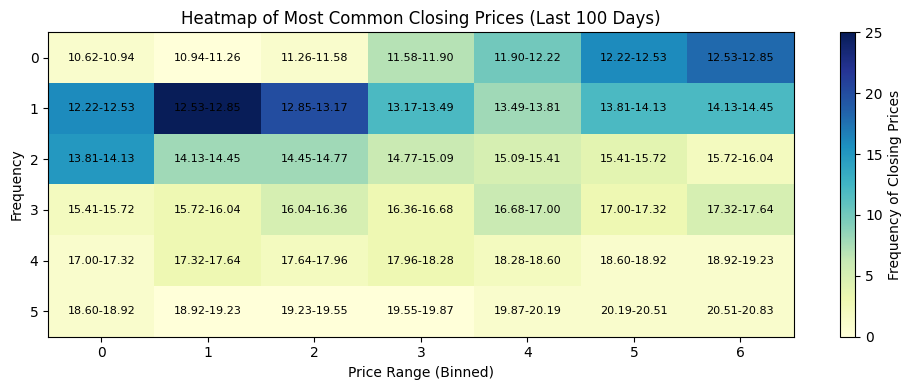

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Copy data
df = data

# Extract the last 100 'Close' prices
last_100_close_prices = df['Close'].tail(300).values

# Define the number of bins (adjust as needed)
num_bins = 42

# Create histogram (frequency counts) for the closing prices
counts, bin_edges = np.histogram(last_100_close_prices, bins=num_bins)

# Reshape the frequency counts into a 2D grid for display in a heatmap
# Here, we'll use a 4x5 grid to display the 20 bins
heatmap_data = counts.reshape(6, 7)

# Create the heatmap
plt.figure(figsize=(10, 4))
plt.imshow(heatmap_data, cmap='YlGnBu', aspect='auto')

# Add colorbar to show frequency scale
cbar = plt.colorbar(label='Frequency of Closing Prices')

# Set labels and title
plt.title('Heatmap of Most Common Closing Prices (Last 100 Days)')
plt.xlabel('Price Range (Binned)')
plt.ylabel('Frequency')

# Optionally overlay bin ranges as text on each cell
for i in range(6):
    for j in range(7):
        bin_label = f"{bin_edges[i*5 + j]:.2f}-{bin_edges[i*5 + j + 1]:.2f}"
        plt.text(j, i, bin_label, ha='center', va='center', color='black', fontsize=8)

# Show the heatmap
plt.tight_layout()
plt.show()


# Hénon map - Chaotic Algorithm

Need to revise

Overflow detected; resetting values.


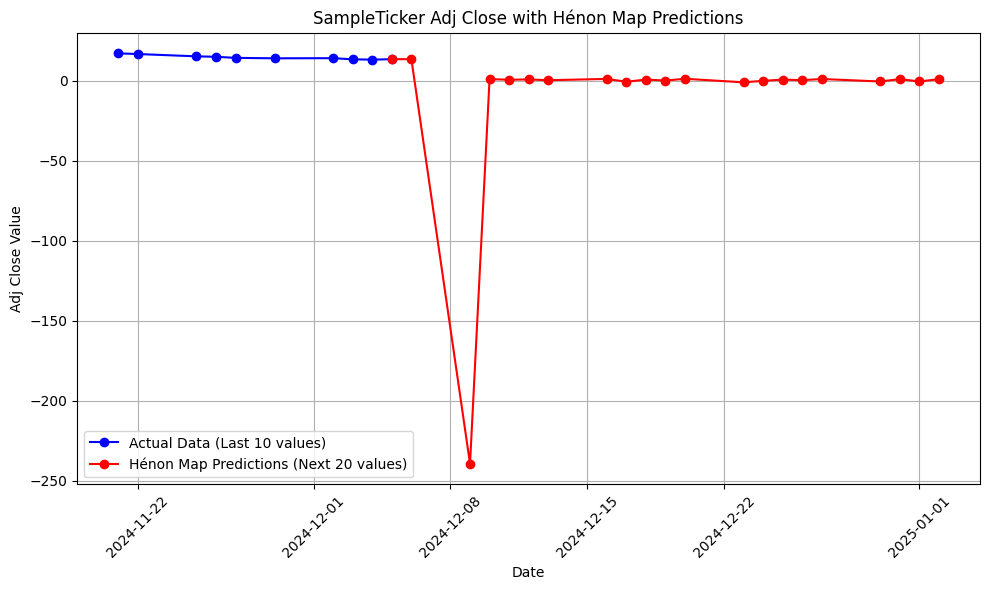

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Copy data
df = data
ticker = "SampleTicker"  # Define the ticker symbol

# Hénon map parameters
a = 1.4
b = 0.3
value_limit = 1e3  # Cap values to prevent overflow

# Check if df has at least 10 entries for the starting points
if len(df) >= 10 and df['Adj Close'].notna().sum() >= 10:
    # Extract the last 10 `Adj Close` values
    last_10_values = df['Adj Close'].iloc[-10:].tolist()
    x, y = last_10_values[-1], last_10_values[-2]
else:
    print("DataFrame does not contain enough data points.")
    last_10_values = [1.0] * 10  # Fallback values
    x, y = last_10_values[-1], last_10_values[-2]

# Number of new values to predict with the Hénon map
num_predictions = 20

# Arrays to store new predicted values
predicted_values = [x]  # Start with the last known value

# Generate the next 20 points using the Hénon map
for _ in range(num_predictions - 1):
    # Calculate the next values
    x_next = 1 - a * x**2 + y
    y_next = b * x

    # Apply limit to prevent overflow
    if abs(x_next) > value_limit or abs(y_next) > value_limit:
        print("Overflow detected; resetting values.")
        x_next, y_next = 1.0, 1.0  # Reset to avoid runaway values

    # Append the new prediction
    predicted_values.append(x_next)

    # Update x and y for the next iteration
    x, y = x_next, y_next

# Combine last 10 actual values with the 20 predictions
full_series = last_10_values + predicted_values

# Generate corresponding dates for the time series plot
dates = pd.to_datetime(df['Date'].iloc[-10:].tolist())  # Last 10 dates from df
future_dates = pd.date_range(dates[-1] + pd.Timedelta(days=1), periods=num_predictions, freq='B')
all_dates = dates.tolist() + future_dates.tolist()

# Plot the time series chart
plt.figure(figsize=(10, 6))
plt.plot(all_dates[:10], full_series[:10], 'bo-', label="Actual Data (Last 10 values)")
plt.plot(all_dates[9:], full_series[9:], 'ro-', label="Hénon Map Predictions (Next 20 values)")
plt.xlabel("Date")
plt.ylabel("Adj Close Value")
plt.title(f"{ticker} Adj Close with Hénon Map Predictions")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Higuchi Fractal Dimension

In [ ]:
import numpy as np

# Copy data
df = data

def higuchi_fractal_dimension(time_series, kmax):
    n = len(time_series)
    lengths = np.zeros(kmax)

    for k in range(1, kmax + 1):
        lk = 0.0
        for m in range(k):
            lmk = 0.0
            for i in range(m, n - k, k):
                lmk += abs(time_series[i + k] - time_series[i])
            lmk /= (n - m) / k
            lk += lmk
        lengths[k - 1] = lk / k

    log_lk = np.log10(lengths)
    log_k = np.log10(np.arange(1, kmax + 1))

    # Linear regression to calculate the slope
    slope = np.polyfit(log_k, log_lk, 1)[0]

    return slope

# Normalize the volumes
max_volume = max(df['Volume'])
normalized_volumes = [v / max_volume for v in df['Volume']]

# Calculate Higuchi Fractal Dimension
fractal_dimension = higuchi_fractal_dimension(normalized_volumes, 10) # Need to think about kmax
print(f"Higuchi Fractal Dimension: {fractal_dimension}")
print('\nInterpretation of the Higuchi Fractal Dimension:')
print('1.0 ≤ HFD < 2.0: Indicates smoother or rougher data.')
print('HFD ≈ 1.5: Often observed in fractional Brownian motion.')
print('HFD > 2.0 or < 1.0: Unusual values.\n')

ZeroDivisionError: division by zero

# Hurst Exponent

In [ ]:
import numpy as np

# Copy data
df = data

def hurst_exponent(volumes):
    n = len(volumes)
    mean_vol = np.mean(volumes)

    rs = np.cumsum(volumes - mean_vol)
    range_rs = np.max(rs) - np.min(rs)
    stdev_vol = np.std(volumes)

    hurst_exp = np.log2(range_rs / stdev_vol) / np.log2(n)

    return hurst_exp

# Calculate Hurst Exponent
hurst = hurst_exponent(np.array(df['Volume']))
print(f"Hurst Exponent: {hurst}")
# Print interpretation legend
print("\nInterpretation of the Hurst Exponent:")
print("H < 0.5: Suggests mean-reverting behavior.")
print("H = 0.5: Suggests a random walk.")
print("H > 0.5: Suggests trending behavior.\n")

Hurst Exponent: nan

Interpretation of the Hurst Exponent:
H < 0.5: Suggests mean-reverting behavior.
H = 0.5: Suggests a random walk.
H > 0.5: Suggests trending behavior.



<ipython-input-27-ec6788952f73>:14: RuntimeWarning: invalid value encountered in scalar divide
  hurst_exp = np.log2(range_rs / stdev_vol) / np.log2(n)


# Ikeda Map - Chaotic Algorithm

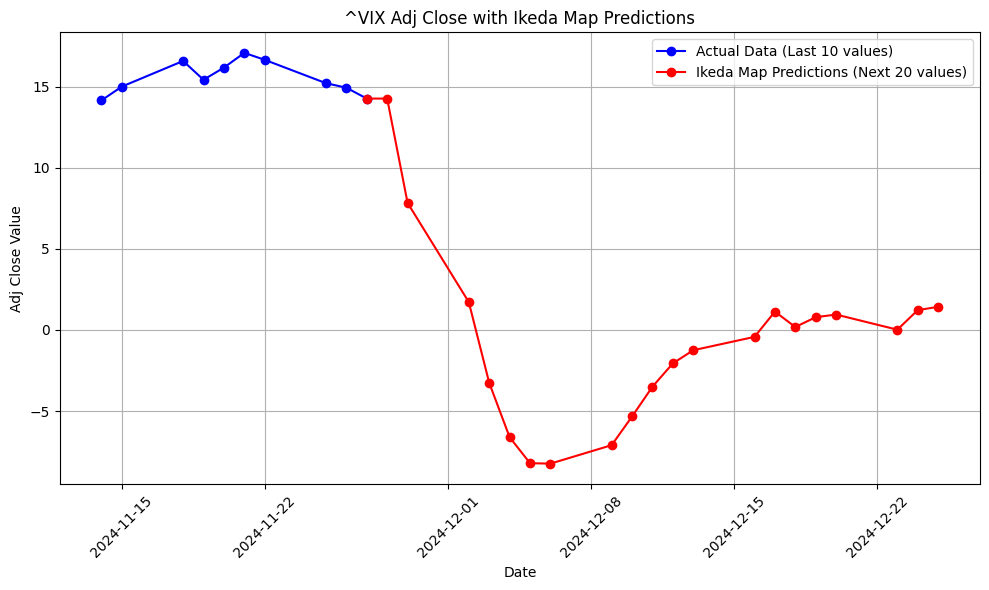

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Copy data
df = data

# Parameters for the Ikeda map
u = 0.9
kappa = 0.4
p = 6.0

# Check if df has at least 10 entries for the starting points
if len(df) >= 10:
    # Extract the last 10 `Adj Close` values as the basis for the time series
    last_10_values = df['Adj Close'].iloc[-10:].tolist()
    x, y = last_10_values[-1], last_10_values[-2]
else:
    print("DataFrame does not contain enough data points.")
    last_10_values = [1.0] * 10  # Fallback values if not enough data
    x, y = last_10_values[-1], last_10_values[-2]

# Number of new values to predict with the Ikeda map
num_predictions = 20

# Arrays to store new predicted values
predicted_values = [x]  # Start with the last known value

# Generate the next 20 points using the Ikeda map
for _ in range(num_predictions - 1):
    theta = kappa - (p / (1 + x**2 + y**2))
    x_next = 1 + u * (x * np.cos(theta) - y * np.sin(theta))
    y_next = u * (x * np.sin(theta) + y * np.cos(theta))

    # Append the new prediction
    predicted_values.append(x_next)

    # Update x and y for the next iteration
    x, y = x_next, y_next

# Combine last 10 actual values with the 20 predictions
full_series = last_10_values + predicted_values

# Generate corresponding dates for the time series plot
# Assuming `Date` column exists in `df`
dates = pd.to_datetime(df['Date'].iloc[-10:].tolist())  # Last 10 dates from df
future_dates = pd.date_range(dates[-1] + pd.Timedelta(days=1), periods=num_predictions, freq='B')  # Business days for predictions
all_dates = dates.tolist() + future_dates.tolist()

# Plot the time series chart
plt.figure(figsize=(10, 6))
plt.plot(all_dates[:10], full_series[:10], 'bo-', label="Actual Data (Last 10 values)")
plt.plot(all_dates[9:], full_series[9:], 'ro-', label="Ikeda Map Predictions (Next 20 values)")
plt.xlabel("Date")
plt.ylabel("Adj Close Value")
plt.title(f"{ticker} Adj Close with Ikeda Map Predictions")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Julia Sets - Chaotic Algorithm

Need to revise

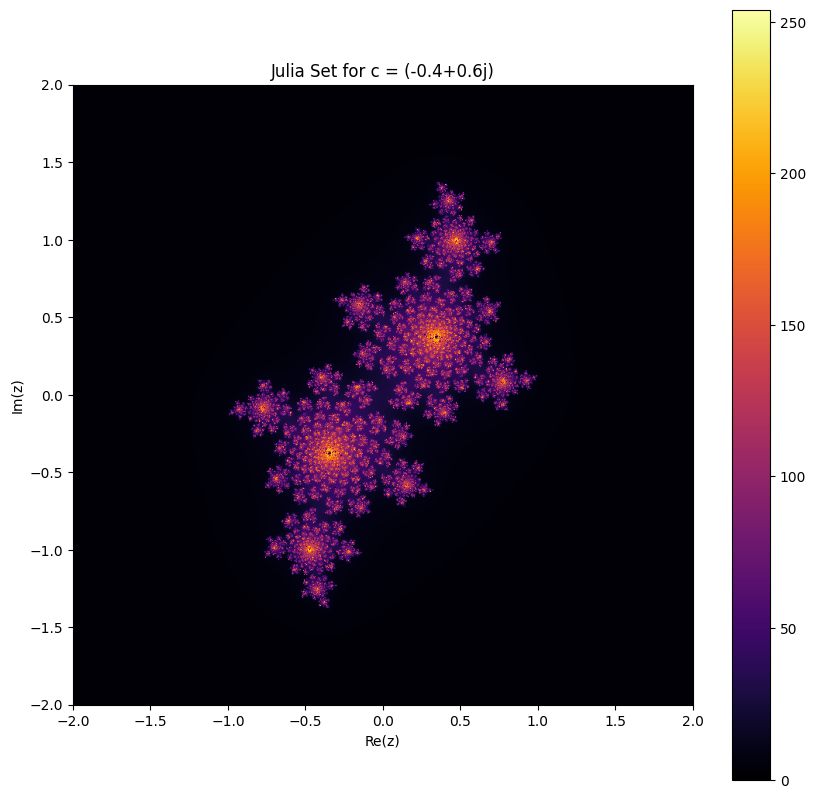

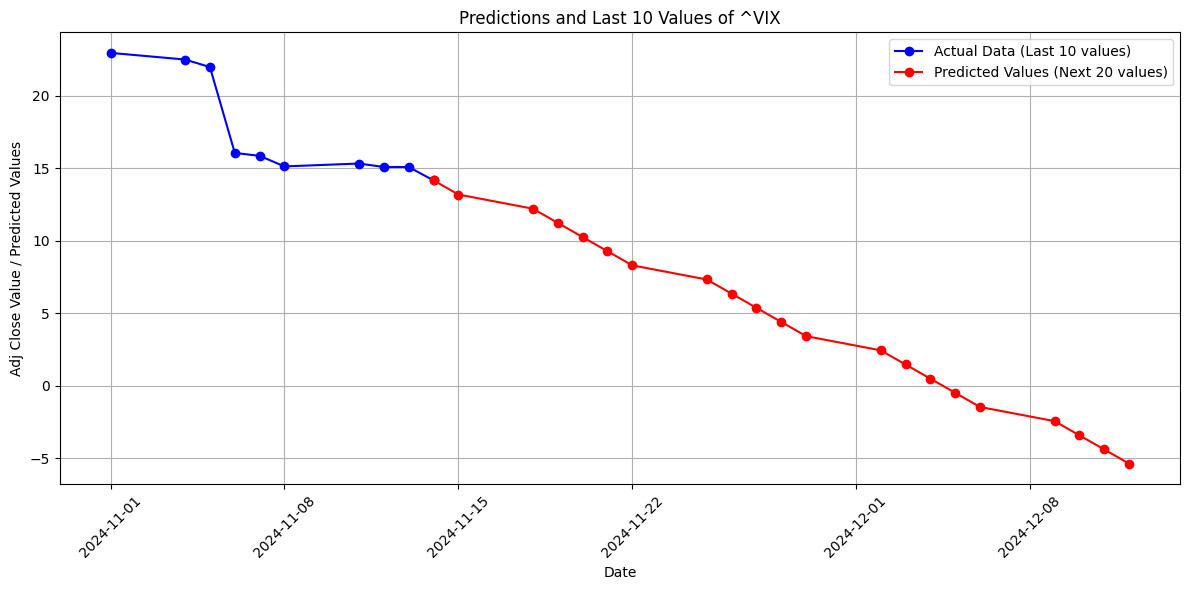

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Copy data
df = data

# Define the function to compute the Julia set
def julia_set(c, xlim, ylim, width, height, max_iter):
    # Create a grid of complex numbers
    x = np.linspace(xlim[0], xlim[1], width)
    y = np.linspace(ylim[0], ylim[1], height)
    z = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
    z = z[:, 0] + 1j * z[:, 1]  # Create complex grid

    # Initialize array to hold the iteration counts
    img = np.zeros(z.shape, dtype=int)

    # Iterate over each point in the complex plane
    for i in range(max_iter):
        mask = np.abs(z) < 100  # Only iterate if z is within a certain bound
        img[mask] = i  # Assign the iteration count
        z[mask] = z[mask] ** 2 + c  # Update z

    img[img == max_iter - 1] = 0  # Mark points that never escaped

    # Reshape the result back to the image dimensions
    img = img.reshape((height, width))
    return img

# Parameters for the Julia set
c = complex(-0.4, 0.6)  # The complex parameter
xlim = (-2, 2)          # X-axis limits
ylim = (-2, 2)          # Y-axis limits
width, height = 800, 800  # Image size
max_iter = 256          # Maximum number of iterations

# Generate the Julia set
julia_image = julia_set(c, xlim, ylim, width, height, max_iter)

# Plotting the Julia set
plt.figure(figsize=(10, 10))
plt.imshow(julia_image, extent=(xlim[0], xlim[1], ylim[0], ylim[1]), cmap='inferno')
plt.colorbar()
plt.title(f"Julia Set for c = {c}")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.grid(False)
plt.show()

# Chart

# Define the function to compute the Julia set
def julia_set2(c, xlim, ylim, width, height, max_iter):
    # Create a grid of complex numbers
    x = np.linspace(xlim[0], xlim[1], width)
    y = np.linspace(ylim[0], ylim[1], height)
    z = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
    z = z[:, 0] + 1j * z[:, 1]  # Create complex grid

    # Initialize array to hold the iteration counts
    img = np.zeros(z.shape, dtype=int)

    # Iterate over each point in the complex plane
    for i in range(max_iter):
        mask = np.abs(z) < 100  # Only iterate if z is within a certain bound
        img[mask] = i  # Assign the iteration count
        z[mask] = z[mask] ** 2 + c  # Update z

    img[img == max_iter - 1] = 0  # Mark points that never escaped

    # Reshape the result back to the image dimensions
    img = img.reshape((height, width))
    return img

# Parameters for the Julia set
c = complex(-0.4, 0.6)  # The complex parameter
xlim = (-2, 2)          # X-axis limits
ylim = (-2, 2)          # Y-axis limits
width, height = 800, 800  # Image size
max_iter = 256          # Maximum number of iterations

# Generate the Julia set
julia_image = julia_set2(c, xlim, ylim, width, height, max_iter)

# Extract real values for time series predictions
real_values = np.linspace(xlim[0], xlim[1], width)[:max_iter]  # Use only a subset for simplicity

# Check if df has at least 10 entries for the starting points
if len(df) >= 10:
    # Extract the last 10 `Adj Close` values
    last_10_values = df['Adj Close'].iloc[-10:].tolist()
else:
    print("DataFrame does not contain enough data points.")
    last_10_values = [1.0] * 10  # Fallback values if not enough data

# Number of new values to predict with the Julia set real values
num_predictions = 20

# Generate predictions based on a trend from last 10 values
# Calculate the mean and the trend (slope)
last_value = last_10_values[-1]
predicted_values = []

# Simple linear prediction based on last value
slope = (last_10_values[-1] - last_10_values[0]) / 9  # Slope of the line connecting first and last
for i in range(num_predictions):
    next_value = last_value + slope  # Predict next value based on slope
    predicted_values.append(next_value)
    last_value = next_value  # Update last value for next iteration

# Combine last 10 actual values with the 20 predictions
full_series = last_10_values + predicted_values

# Generate corresponding dates for the time series plot
# Assuming `Date` column exists in `df`
dates = pd.to_datetime(df['Date'].iloc[-10:].tolist())  # Last 10 dates from df
future_dates = pd.date_range(dates[-1] + pd.Timedelta(days=1), periods=num_predictions, freq='B')  # Business days for predictions
all_dates = dates.tolist() + future_dates.tolist()

# Plot the time series chart
plt.figure(figsize=(12, 6))
plt.plot(all_dates[:10], full_series[:10], 'bo-', label="Actual Data (Last 10 values)")
plt.plot(all_dates[9:], full_series[9:], 'ro-', label="Predicted Values (Next 20 values)")
plt.xlabel("Date")
plt.ylabel("Adj Close Value / Predicted Values")
plt.title(f"Predictions and Last 10 Values of {ticker}")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Kalman Filter - Linear Quadratic Estimation

https://en.wikipedia.org/wiki/Kalman_filter

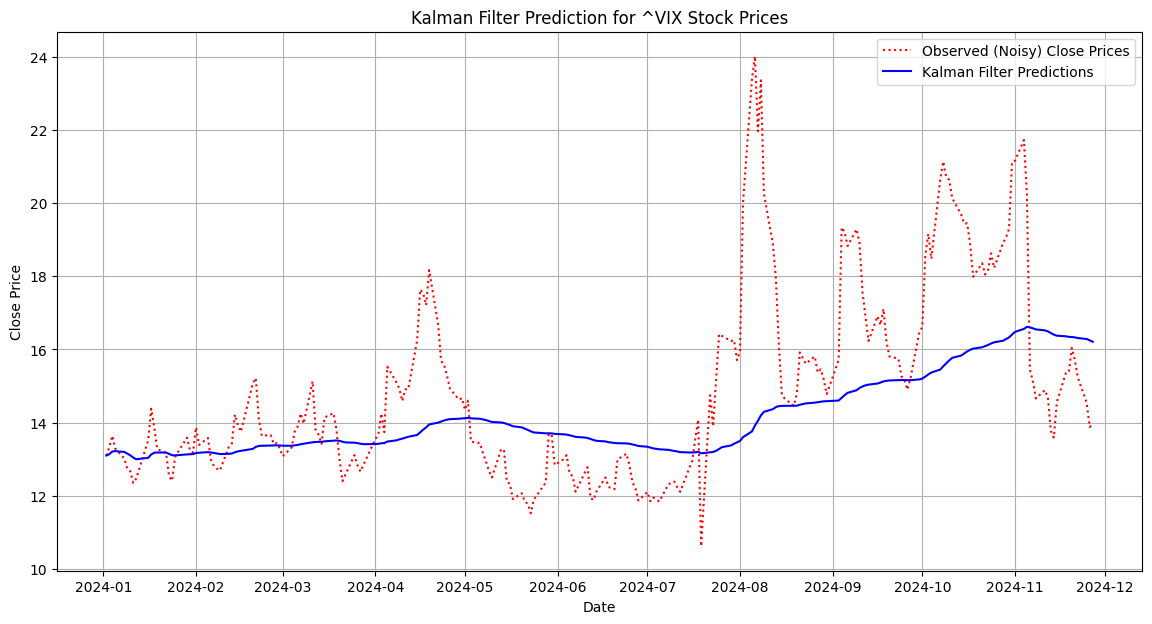

In [ ]:
# Copy data
df = data

df = df[['Date', 'Close']]
df = df.dropna()

# Kalman Filter parameters
observed_values = df['Close'].values  # Observed prices (time series)
predictions = []  # To store predictions
x = observed_values[0]  # Initial state estimate
P = 1  # Initial uncertainty

Q = 1e-3  # Process variance
R = 4     # Measurement variance

# Kalman Filter process
for z in observed_values:
    # Prediction step
    x = x  # No control input, so just state estimate
    P = P + Q  # Update uncertainty in the prediction

    # Update step
    K = P / (P + R)  # Kalman Gain
    x = x + K * (z - x)  # Update estimate with measurement
    P = (1 - K) * P  # Update uncertainty

    # Store prediction
    predictions.append(x)

# Add predictions to DataFrame
df['Kalman_Prediction'] = predictions

# Plot observed and predicted values
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label="Observed (Noisy) Close Prices", color="red", linestyle="dotted")
plt.plot(df['Date'], df['Kalman_Prediction'], label="Kalman Filter Predictions", color="blue")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title(f"Kalman Filter Prediction for {ticker} Stock Prices")
plt.legend()
plt.grid(True)
plt.show()

# Linear Regression

Need to revise

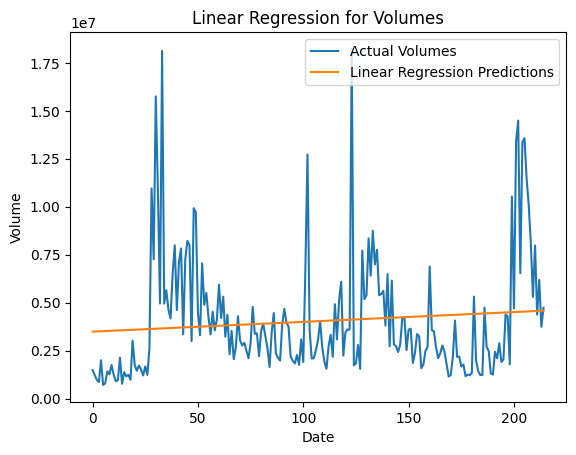

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Copy data
df = data

# Assuming your DataFrame is named 'df' and the volume column is 'Volume'
X = np.arange(len(df)).reshape(-1, 1)  # Create a feature matrix with time steps
y = df['Volume']  # Target variable (volume)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plot the results
plt.plot(df.index, y, label='Actual Volumes')  # Assuming 'df' has a datetime index
plt.plot(df.index, predictions, label='Linear Regression Predictions')
plt.legend()
plt.title('Linear Regression for Volumes')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

# Lorenz System - Chaotic Algorithm

Need to revise

Lorenz trajectory: [[20.24338608  1.54979773  1.06763776]
 [20.0564502   2.09345014  1.09616388]
 [19.8768202   2.63095214  1.13522796]
 [19.70436152  3.16230743  1.18449565]
 [19.53894098  3.68752752  1.24364824]]


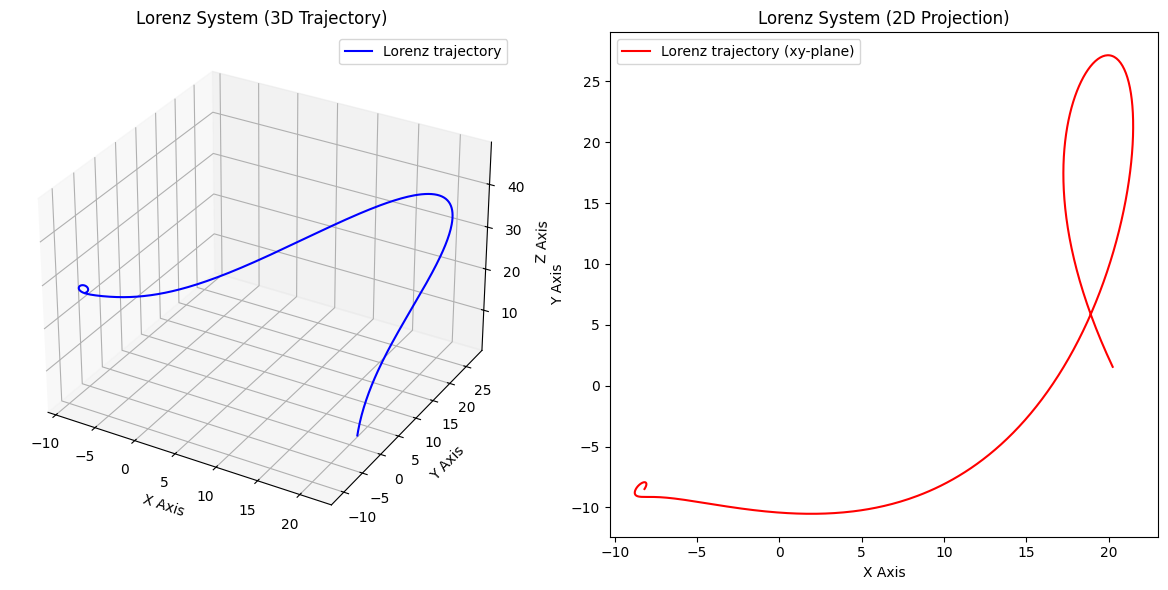

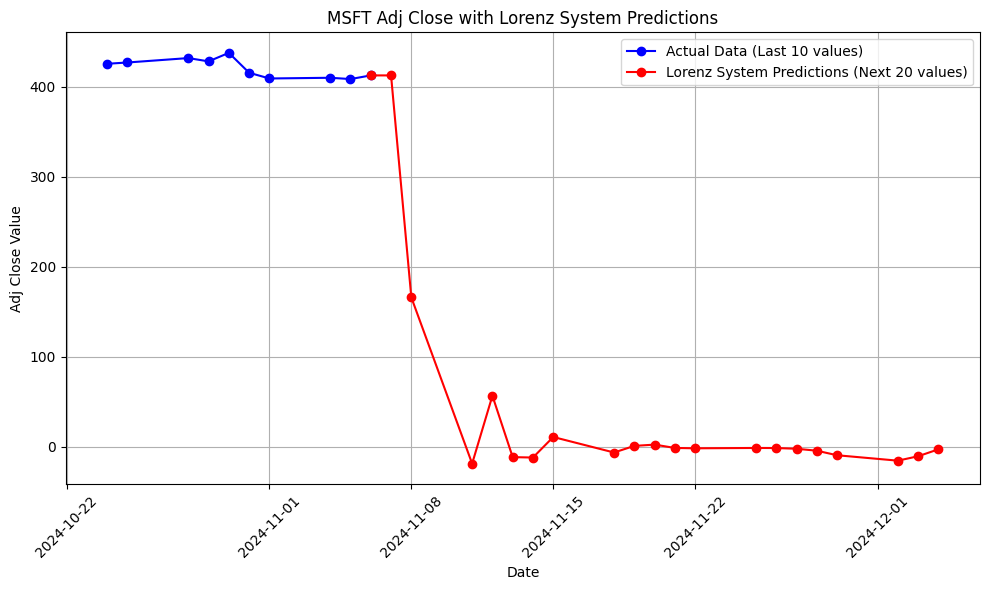

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.integrate import odeint

# Copy data
df = data

def lorenz_system(initial_state, dt, steps):
    sigma = 10.0
    rho = 28.0
    beta = 8.0 / 3.0

    state = np.array(initial_state)
    trajectory = np.zeros((steps, 3))

    for i in range(steps):
        dx = sigma * (state[1] - state[0])
        dy = state[0] * (rho - state[2]) - state[1]
        dz = state[0] * state[1] - beta * state[2]

        state[0] += dx * dt
        state[1] += dy * dt
        state[2] += dz * dt

        trajectory[i] = state

    return trajectory

# Simulate Lorenz system
initial_state = [np.mean(df['Volume']) / 1_000_000, 1.0, 1.05]
lorenz_trajectory = lorenz_system(initial_state, dt=0.001, steps=1000)
print(f"Lorenz trajectory: {lorenz_trajectory[:5]}")  # Show first 5 points

# Extract x, y, z coordinates
x = lorenz_trajectory[:, 0]
y = lorenz_trajectory[:, 1]
z = lorenz_trajectory[:, 2]

# Create a 3D plot
fig = plt.figure(figsize=(12, 6))

# 3D plot of Lorenz trajectory
ax_3d = fig.add_subplot(121, projection='3d')
ax_3d.plot(x, y, z, label='Lorenz trajectory', color='b')
ax_3d.set_xlabel('X Axis')
ax_3d.set_ylabel('Y Axis')
ax_3d.set_zlabel('Z Axis')
ax_3d.set_title('Lorenz System (3D Trajectory)')
ax_3d.legend()

# 2D plot of the same Lorenz trajectory projected onto the xy-plane
ax_2d = fig.add_subplot(122)
ax_2d.plot(x, y, label='Lorenz trajectory (xy-plane)', color='r')
ax_2d.set_xlabel('X Axis')
ax_2d.set_ylabel('Y Axis')
ax_2d.set_title('Lorenz System (2D Projection)')
ax_2d.legend()

# Show both plots
plt.tight_layout()
plt.show()

# 3rd chart

# Lorenz system parameters
sigma = 10
rho = 28
beta = 8 / 3

# Check if df has at least 10 entries for the starting points
if len(df) >= 10:
    # Extract the last 10 `Adj Close` values as the basis for the time series
    last_10_values = df['Adj Close'].iloc[-10:].tolist()
    x0, y0 = last_10_values[-1], last_10_values[-2]
else:
    print("DataFrame does not contain enough data points.")
    last_10_values = [1.0] * 10  # Fallback values if not enough data
    x0, y0 = last_10_values[-1], last_10_values[-2]

# Set initial conditions and time points for prediction
z0 = 0.0  # Initial value for z
initial_conditions = [x0, y0, z0]
num_predictions = 20
time = np.linspace(0, 2, num_predictions)  # Time range for predictions

# Define the Lorenz system equations
def lorenz_system2(state, t):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Integrate the Lorenz system
predicted_values = odeint(lorenz_system2, initial_conditions, time)

# Extract predicted x values for the time series
predicted_x_values = predicted_values[:, 0]  # We use x as the predicted series

# Combine last 10 actual values with the 20 predictions
full_series = last_10_values + predicted_x_values.tolist()

# Generate corresponding dates for the time series plot
# Assuming `Date` column exists in `df`
dates = pd.to_datetime(df['Date'].iloc[-10:].tolist())  # Last 10 dates from df
future_dates = pd.date_range(dates[-1] + pd.Timedelta(days=1), periods=num_predictions, freq='B')  # Business days for predictions
all_dates = dates.tolist() + future_dates.tolist()

# Plot the time series chart
plt.figure(figsize=(10, 6))
plt.plot(all_dates[:10], full_series[:10], 'bo-', label="Actual Data (Last 10 values)")
plt.plot(all_dates[9:], full_series[9:], 'ro-', label="Lorenz System Predictions (Next 20 values)")
plt.xlabel("Date")
plt.ylabel("Adj Close Value")
plt.title(f"{ticker} Adj Close with Lorenz System Predictions")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# Markov

**Markov Chain for Price**

In [ ]:
import pandas as pd
import numpy as np

# Copy data
df = data

def markov_chain_transition_state(data):
    """
    Generates the Markov Chain transition state matrix.

    Args:
        data: pandas DataFrame containing the price data.

    Returns:
        pandas DataFrame representing the transition state matrix and the predicted next state.
    """

    # Assuming 'Close' column contains the price data
    prices = data['Close'].values

    # Discretize prices into states (e.g., Low, Medium, High)
    low_threshold = data['Close'].quantile(0.33)
    high_threshold = data['Close'].quantile(0.66)
    states = np.where(prices < low_threshold, 'Low', np.where(prices > high_threshold, 'High', 'Medium'))

    # Create transition state matrix
    unique_states = np.unique(states)
    transition_matrix = pd.DataFrame(0, index=unique_states, columns=unique_states)

    for i in range(len(states) - 1):
        current_state = states[i]
        next_state = states[i + 1]
        transition_matrix.loc[current_state, next_state] += 1

    # Normalize transition matrix to get probabilities
    transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

    # Add "From/To" column for readability
    transition_matrix.index.name = "From/To"
    transition_matrix.reset_index(inplace=True)

    # Predict the next state based on the last observed state
    current_state = states[-1]  # Last observed state
    print(f"Current state: {current_state}")

    # Extract only the numeric columns (the state probabilities)
    state_probabilities = transition_matrix[transition_matrix['From/To'] == current_state].drop(columns=['From/To'])

    # Find the next state with the highest transition probability
    predicted_next_state = state_probabilities.idxmax(axis=1).values[0]

    return transition_matrix, predicted_next_state

# Assuming you have your data in a DataFrame called 'df'
transition_state, predicted_next_state = markov_chain_transition_state(df)
print(transition_state)
print(f"Next predicted state: {predicted_next_state}")

Current state: High
  From/To      High       Low    Medium
0    High  0.892857  0.000000  0.107143
1     Low  0.000000  0.855422  0.144578
2  Medium  0.121951  0.134146  0.743902
Next predicted state: High


**Markov Chain for Volumes**

In [ ]:
import pandas as pd
import numpy as np

# Copy data
df = data

def markov_chain_transition_state_volume(data):
    """
    Generates the Markov Chain transition state matrix and predicts the next state for Volumes.

    Args:
        data: pandas DataFrame containing the volume data.

    Returns:
        tuple: (pandas DataFrame representing the transition state matrix,
                 predicted next state)
    """

    # Convert 'Volume' column to numeric
    data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')

    # Assuming 'Volume' column contains the volume data
    volumes = data['Volume'].values

    # Discretize volumes into states (e.g., Low, Medium, High)
    low_threshold = data['Volume'].quantile(0.33)
    high_threshold = data['Volume'].quantile(0.66)
    states = np.where(volumes < low_threshold, 'Low', np.where(volumes > high_threshold, 'High', 'Medium'))

    # Create transition state matrix
    unique_states = np.unique(states)
    transition_matrix = pd.DataFrame(0, index=unique_states, columns=unique_states)

    for i in range(len(states) - 1):
        current_state = states[i]
        next_state = states[i + 1]
        transition_matrix.loc[current_state, next_state] += 1

    # Normalize transition matrix to get probabilities
    transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

    # Add "From/To" column for readability
    transition_matrix.index.name = "From/To"
    transition_matrix.reset_index(inplace=True)

    # Predict the next state based on the last observed state
    current_state = states[-1]  # Last observed state
    print(f"Current state: {current_state}")

    # Extract only the numeric columns (state probabilities)
    state_probabilities = transition_matrix[transition_matrix['From/To'] == current_state].drop(columns=['From/To'])

    # Find the next state with the highest transition probability
    predicted_next_state = state_probabilities.idxmax(axis=1).values[0]

    return transition_matrix, predicted_next_state

# Assuming you have your data in a DataFrame called 'df'
transition_state_volume, predicted_next_state_volume = markov_chain_transition_state_volume(df)
print(transition_state_volume)
print(f"Next predicted state for Volume: {predicted_next_state_volume}")

Current state: Medium
  From/To  Medium
0  Medium     1.0
Next predicted state for Volume: Medium


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Copy data
df = data

def predict_next_10_volumes(temp_data):
    """
    Predicts the next 10 volumes using a Markov Chain.

    Args:
        temp_data: List of volume temp_data.

    Returns:
        List of predicted next 10 volumes.
    """

    # Discretize volumes into states (e.g., Low, Medium, High)
    # Example discretization using quantiles:
    low_threshold = np.quantile(temp_data, 0.33)
    high_threshold = np.quantile(temp_data, 0.66)
    states = np.where(temp_data < low_threshold, 'Low', np.where(temp_data > high_threshold, 'High', 'Medium'))

    # Create transition state matrix
    unique_states = np.unique(states)
    transition_matrix = pd.DataFrame(0, index=unique_states, columns=unique_states)

    for i in range(len(states) - 1):
        current_state = states[i]
        next_state = states[i + 1]
        transition_matrix.loc[current_state, next_state] += 1

    # Normalize transition matrix to get probabilities
    transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

    # Predict next 10 volumes
    current_state = states[-1]  # Last observed state
    predicted_volumes = []
    for _ in range(10):
        predicted_next_state = transition_matrix[transition_matrix.index == current_state].idxmax(axis=1).values[0]
        # Map predicted state back to volume range
        if predicted_next_state == 'Low':
            predicted_volume = np.random.randint(int(temp_data.min()), int(low_threshold))
        elif predicted_next_state == 'High':
            predicted_volume = np.random.randint(int(high_threshold), int(temp_data.max()))
        else:  # Medium
            predicted_volume = np.random.randint(int(low_threshold), int(high_threshold))
        predicted_volumes.append(predicted_volume)
        current_state = predicted_next_state

    return predicted_volumes

temp_data = df['Volume']
predicted_volumes = predict_next_10_volumes(temp_data)
print("Predicted next 10 volumes:", predicted_volumes)

# Assuming you have the original temp_data in a variable called 'temp_data'
last_10_volumes = temp_data[-10:]

# Create x-axis values for plotting
x_values_last_10 = np.arange(len(last_10_volumes))
x_values_predicted = np.arange(len(last_10_volumes), len(last_10_volumes) + len(predicted_volumes))

# Plot the last 10 volumes
plt.plot(x_values_last_10, last_10_volumes, label='Last 10 Volumes')

# Plot the predicted 10 volumes
plt.plot(x_values_predicted, predicted_volumes, label='Predicted 10 Volumes')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Last 10 Volumes vs. Predicted 10 Volumes')

# Add legend
plt.legend()

# Display the chart
plt.show()

ValueError: high <= 0

# Mackey-Glass Equation - Chaotic Algorithm

Need to revise

          Date   Open   High    Low  Close  Adj Close  Volume
0   2024-01-02  13.20  13.20  14.23  13.10      13.22       0
1   2024-01-03  14.04  14.04  14.22  13.33      13.35       0
2   2024-01-04  14.13  14.13  14.20  13.64      13.93       0
3   2024-01-05  13.35  13.35  14.58  13.29      14.24       0
4   2024-01-08  13.08  13.08  14.18  13.02      14.00       0
..         ...    ...    ...    ...    ...        ...     ...
230 2024-11-29  13.51  13.51  14.15  13.49      14.00       0
231 2024-12-02  13.34  13.34  14.10  13.30      14.08       0
232 2024-12-03  13.30  13.30  13.77  13.19      13.38       0
233 2024-12-04  13.45  13.45  13.61  12.89      13.16       0
234 2024-12-05  13.54  13.54  13.70  13.26      13.46       0

[235 rows x 7 columns]


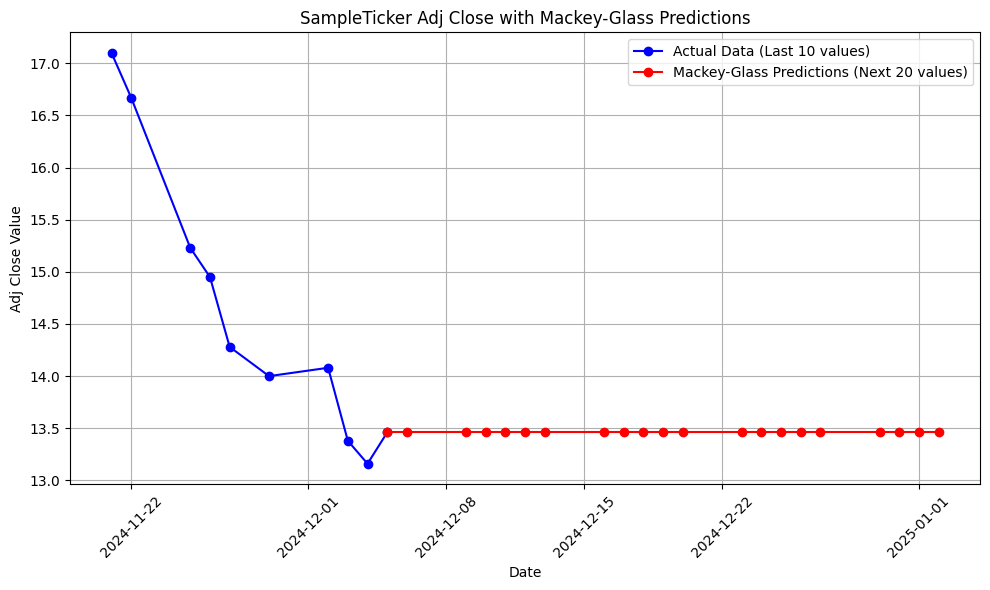

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp

# Copy data
df = data

print(df)

# Mackey-Glass equation parameters
a = 2
b = 1
n = 10
tau = 17  # Delay

# Check if df has at least 10 entries for the starting points
if len(df) >= 10:
    # Extract the last 10 `Adj Close` values as the basis for the time series
    last_10_values = df['Adj Close'].iloc[-10:].tolist()
    initial_value = last_10_values[-1]
else:
    print("DataFrame does not contain enough data points.")
    last_10_values = [1.0] * 10  # Fallback values if not enough data
    initial_value = last_10_values[-1]

# Number of new values to predict with the Mackey-Glass equation
num_predictions = 20
time = np.linspace(0, 200, 1000)  # Time range for integration

# Extend initial history for the Mackey-Glass equation
history_length = tau + len(last_10_values)
initial_history = np.zeros(history_length)  # Initialize with zeros
initial_history[-len(last_10_values):] = last_10_values  # Fill with last known values

# Define the Mackey-Glass function
def mackey_glass(t, x):
    if t < tau:
        return [0]  # No feedback until t >= tau
    else:
        idx = int(t)  # Convert time to integer index
        if idx - tau >= 0 and idx < len(initial_history):
            return [(a * initial_history[idx - tau]) / (1 + initial_history[idx - tau] ** n) - b * x[0]]
        else:
            return [0]  # Return zero if out of bounds

# Use solve_ivp to integrate the Mackey-Glass equation
sol = solve_ivp(mackey_glass, [0, 200], [initial_value], t_eval=time)

# Get the predicted values
predicted_values = sol.y[0][-num_predictions:]  # Take the last 20 predicted values

# Combine last 10 actual values with the 20 predictions
full_series = last_10_values + predicted_values.tolist()

# Generate corresponding dates for the time series plot
# Assuming `Date` column exists in `df`
dates = pd.to_datetime(df['Date'].iloc[-10:].tolist())  # Last 10 dates from df
future_dates = pd.date_range(dates[-1] + pd.Timedelta(days=1), periods=num_predictions, freq='B')  # Business days for predictions
all_dates = dates.tolist() + future_dates.tolist()

# Plot the time series chart
plt.figure(figsize=(10, 6))
plt.plot(all_dates[:10], full_series[:10], 'bo-', label="Actual Data (Last 10 values)")
plt.plot(all_dates[9:], full_series[9:], 'ro-', label="Mackey-Glass Predictions (Next 20 values)")
plt.xlabel("Date")
plt.ylabel("Adj Close Value")
plt.title(f"{ticker} Adj Close with Mackey-Glass Predictions")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# MF-DMA Multifractal Detrended Moving Average

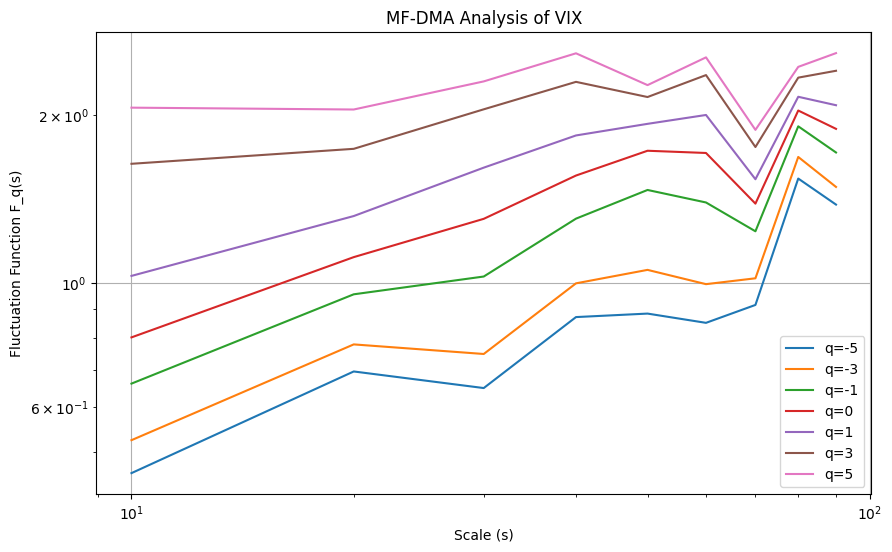

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_mf_dma(time_series, scale_range, q_values):
    """
    Perform MF-DMA analysis on a time series.

    :param time_series: Input time series as a NumPy array.
    :param scale_range: List of scales (segment sizes) to analyze.
    :param q_values: List of q values for multifractal analysis.
    :return: Dictionary containing fluctuation functions for each q.
    """
    N = len(time_series)
    fluctuation_functions = {q: [] for q in q_values}

    for scale in scale_range:
        segments = int(N / scale)
        rms_list = []

        for i in range(segments):
            start = i * scale
            end = start + scale
            segment = time_series[start:end]
            trend = np.mean(segment)
            rms = np.sqrt(np.mean((segment - trend) ** 2))
            rms_list.append(rms)

        for q in q_values:
            if q == 0:
                fluctuation_functions[q].append(np.exp(0.5 * np.mean(np.log(np.array(rms_list) ** 2))))
            else:
                fluctuation_functions[q].append(np.mean(np.array(rms_list) ** q) ** (1 / q))

    return fluctuation_functions

# Load VIX data
# Copy data
df = data
vix_prices = df["Close"].values  # Adjust column name if needed

# Parameters
scale_range = range(10, 100, 10)  # Segment sizes
q_values = [-5, -3, -1, 0, 1, 3, 5]  # q values

# Perform MF-DMA
fluctuations = calculate_mf_dma(vix_prices, scale_range, q_values)

# Plot the fluctuation functions
plt.figure(figsize=(10, 6))
for q in q_values:
    plt.plot(scale_range, fluctuations[q], label=f"q={q}")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Scale (s)")
plt.ylabel("Fluctuation Function F_q(s)")
plt.title("MF-DMA Analysis of VIX")
plt.legend()
plt.grid(True)
plt.show()


# Pearson

**Pearson Correlation Coefficient**

In [ ]:
# Copy data
df = data

df[['Close', 'Volume']].corr()
corelation = df['Close'].corr(df['Volume'])
print(f"Pearson Correlation Coefficient: {corelation}")

def print_pearson_legend():
    print("### Pearson Correlation Interpretation ###\n")
    print("The Pearson Correlation Coefficient (r) ranges between -1 and +1 and describes the linear relationship between two variables.")
    print("\nInterpretation of the Pearson Coefficient:")
    print("  - **r = +1**: Perfect positive linear relationship (as one variable increases, the other increases).")
    print("  - **r = -1**: Perfect negative linear relationship (as one variable increases, the other decreases).")
    print("  - **r = 0**: No linear relationship between the variables.")
    print("\nRange Interpretation:")
    print("  - **0.7 ≤ |r| ≤ 1**: Strong linear relationship.")
    print("  - **0.3 ≤ |r| < 0.7**: Moderate linear relationship.")
    print("  - **0 ≤ |r| < 0.3**: Weak linear relationship.")
    print("\nNote: Pearson correlation only captures linear relationships. Nonlinear correlations may exist even if r is close to 0.\n")

# Example of calling the legend
print_pearson_legend()


Pearson Correlation Coefficient: nan
### Pearson Correlation Interpretation ###

The Pearson Correlation Coefficient (r) ranges between -1 and +1 and describes the linear relationship between two variables.

Interpretation of the Pearson Coefficient:
  - **r = +1**: Perfect positive linear relationship (as one variable increases, the other increases).
  - **r = -1**: Perfect negative linear relationship (as one variable increases, the other decreases).
  - **r = 0**: No linear relationship between the variables.

Range Interpretation:
  - **0.7 ≤ |r| ≤ 1**: Strong linear relationship.
  - **0.3 ≤ |r| < 0.7**: Moderate linear relationship.
  - **0 ≤ |r| < 0.3**: Weak linear relationship.

Note: Pearson correlation only captures linear relationships. Nonlinear correlations may exist even if r is close to 0.



/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


# Perlin Noise

In [ ]:
pip install noise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for noise: filename=noise-1.2.2-cp310-cp310-linux_x86_64.whl size=56273 sha256=f4ad6389b6c032765811a5a3660147f5338629f8215c754fa3e2b457238510dd
  Stored in directory: /root/.cache/pip/wheels/b2/01/64/ca2f6ed556c204d5ce2d3719a58757a5504aeb5525654692d0
Successfully built noise


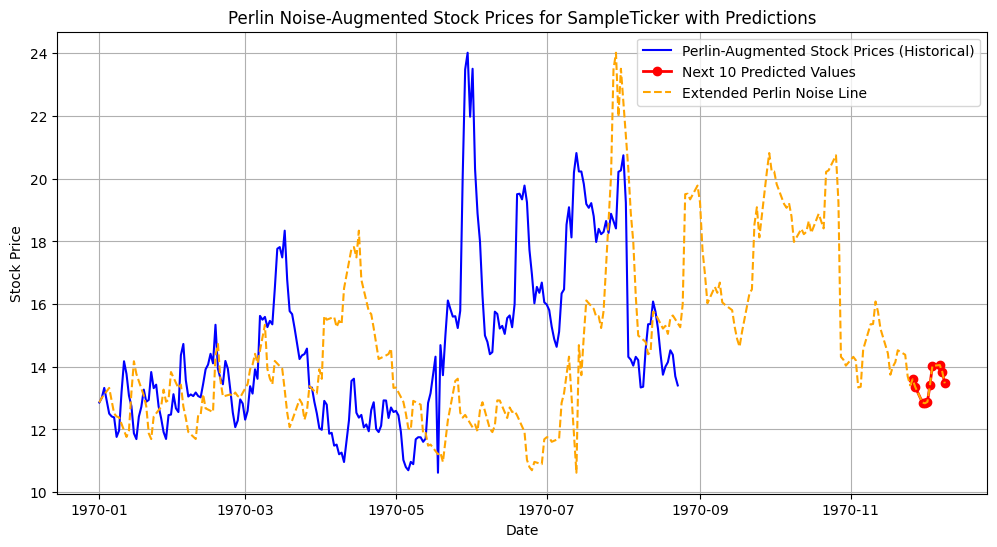

In [ ]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from noise import pnoise1

# Generate Perlin noise
def generate_perlin_noise(length, scale=0.1, octaves=1, persistence=0.5, lacunarity=2.0, seed=None):
    """
    Generate a Perlin noise time series.
    Parameters:
    - length: Number of points in the time series.
    - scale: Controls the "zoom level" of the noise (smaller values give smoother noise).
    - octaves: Number of layers of Perlin noise combined.
    - persistence: Amplitude of each octave relative to the previous.
    - lacunarity: Frequency of each octave relative to the previous.
    - seed: Random seed for consistent results.
    Returns:
    - np.array of Perlin noise values.
    """
    if seed is not None:
        np.random.seed(seed)
    base = np.random.randint(0, 1000) if seed is None else seed  # Random or fixed base for Perlin
    noise = np.array([pnoise1(i * scale, octaves=octaves, persistence=persistence, lacunarity=lacunarity, base=base) for i in range(length)])
    return noise

# Fetch stock price data
df = data

# Use the closing prices
stock_prices = df['Close'].dropna().values
time_steps = len(stock_prices)

# Normalize stock prices for blending with Perlin noise
min_price, max_price = min(stock_prices), max(stock_prices)
normalized_prices = (stock_prices - min_price) / (max_price - min_price)

# Generate Perlin noise with the same length as the stock prices
perlin_noise = generate_perlin_noise(length=time_steps + 10, scale=0.05, octaves=4, persistence=0.6, lacunarity=2.0, seed=42)

# Blend Perlin noise with normalized stock prices for the historical series
blended_prices = normalized_prices + 0.2 * perlin_noise[:time_steps]  # Adjust noise amplitude
blended_prices = (blended_prices - np.min(blended_prices)) / (np.max(blended_prices) - np.min(blended_prices))  # Re-normalize
blended_prices = blended_prices * (max_price - min_price) + min_price  # Map back to original price range

# Generate the next 10 noise-augmented stock price predictions
next_10_values = perlin_noise[time_steps:] * (max_price - min_price) * 0.2 + blended_prices[-1]

# Combine the historical and predicted values
extended_perlin_line = np.concatenate([blended_prices, next_10_values])

# Generate extended dates
extended_dates = pd.date_range(df.index[0], periods=time_steps + 10, freq='B')

# Plot the combined Perlin noise line
plt.figure(figsize=(12, 6))
plt.plot(df.index, blended_prices, label="Perlin-Augmented Stock Prices (Historical)", color="blue")
plt.plot(extended_dates[-10:], next_10_values, 'ro-', label="Next 10 Predicted Values", linewidth=2)  # Red dots for predictions
plt.plot(extended_dates, extended_perlin_line, color="orange", linestyle="dashed", label="Extended Perlin Noise Line")

# Enhance the graph
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"Perlin Noise-Augmented Stock Prices for {ticker} with Predictions")
plt.legend()
plt.grid(True)
plt.show()


# Random Forest

Mean Squared Error: 0.0
R-squared: 1.0


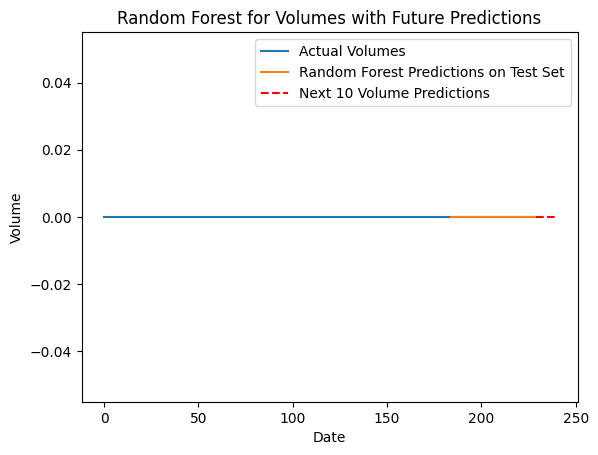

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Copy data
df = data

# Assuming your DataFrame is named 'df' and the volume column is 'Volume'

# Prepare data
X = np.arange(len(df)).reshape(-1, 1)  # Feature matrix (time steps)
y = df['Volume']  # Target variable (volume)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust parameters as needed
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

# Predict the next 10 values beyond the current data range
future_steps = 10
X_future = np.arange(len(df), len(df) + future_steps).reshape(-1, 1)
future_predictions = model.predict(X_future)

# Plot the results
plt.plot(df.index, df['Volume'], label='Actual Volumes')
plt.plot(df.index[-len(y_test):], predictions, label='Random Forest Predictions on Test Set')
plt.plot(df.index[-1:].append(pd.RangeIndex(start=len(df), stop=len(df) + future_steps)),
         np.concatenate([df['Volume'].values[-1:], future_predictions]),
         label='Next 10 Volume Predictions', linestyle='--', color='red')
plt.legend()
plt.title('Random Forest for Volumes with Future Predictions')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


# Rössler Attractor - Chaotic Algorithm

Need to revise

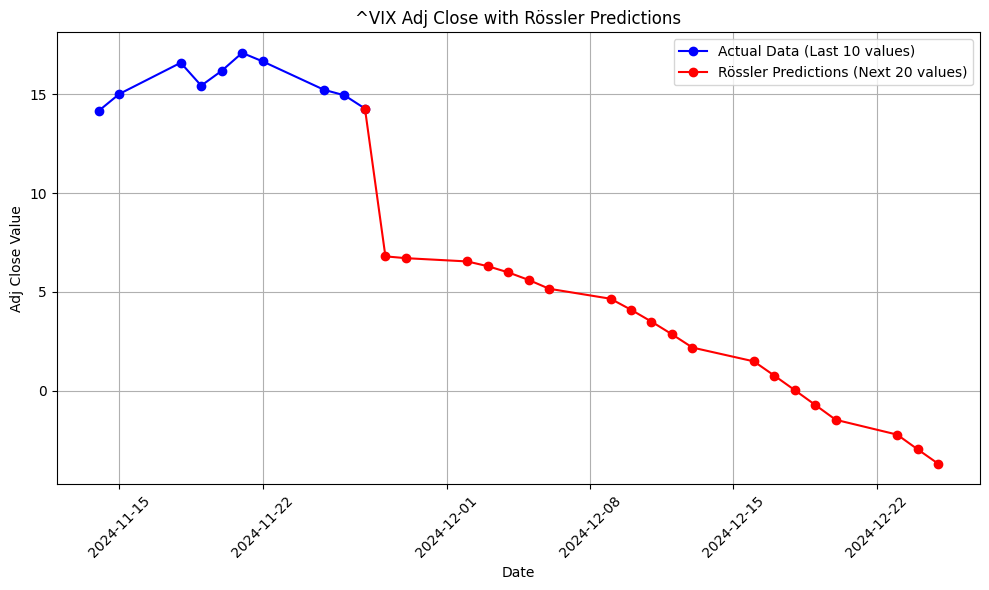

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp

# Copy data
df = data

# Rössler attractor parameters
a = 0.2
b = 0.2
c = 5.7

# Check if df has at least 10 entries for the starting points
if len(df) >= 10:
    # Extract the last 10 `Adj Close` values as the basis for the time series
    last_10_values = df['Adj Close'].iloc[-10:].tolist()
    initial_value = last_10_values[-1]
else:
    print("DataFrame does not contain enough data points.")
    last_10_values = [1.0] * 10  # Fallback values if not enough data
    initial_value = last_10_values[-1]

# Number of new values to predict with the Rössler attractor
num_predictions = 20

# Time span for integration
t_span = (0, 100)
time_eval = np.linspace(t_span[0], t_span[1], 1000)  # Time range for integration

# Define the Rössler attractor equations
def rossler(t, state):
    x, y, z = state
    dxdt = -y - z
    dydt = x + a * y
    dzdt = b + z * (x - c)
    return [dxdt, dydt, dzdt]

# Use solve_ivp to integrate the Rössler attractor equations
initial_state = [initial_value, 0.0, 0.0]  # Assuming y and z start at 0
sol = solve_ivp(rossler, t_span, initial_state, t_eval=time_eval)

# Extract the predicted values (using x values for demonstration)
predicted_values = sol.y[0][-num_predictions:]  # Take the last 20 predicted x values

# Combine last 10 actual values with the 20 predictions
full_series = last_10_values + predicted_values.tolist()

# Generate corresponding dates for the time series plot
# Assuming `Date` column exists in `df`
dates = pd.to_datetime(df['Date'].iloc[-10:].tolist())  # Last 10 dates from df
future_dates = pd.date_range(dates[-1] + pd.Timedelta(days=1), periods=num_predictions, freq='B')  # Business days for predictions
all_dates = dates.tolist() + future_dates.tolist()

# Plot the time series chart
plt.figure(figsize=(10, 6))
plt.plot(all_dates[:10], full_series[:10], 'bo-', label="Actual Data (Last 10 values)")
plt.plot(all_dates[9:], full_series[9:], 'ro-', label="Rössler Predictions (Next 20 values)")
plt.xlabel("Date")
plt.ylabel("Adj Close Value")
plt.title(f"{ticker} Adj Close with Rössler Predictions")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Standard Map (Chirikov-Taylor Map) - Chaotic Algorithm

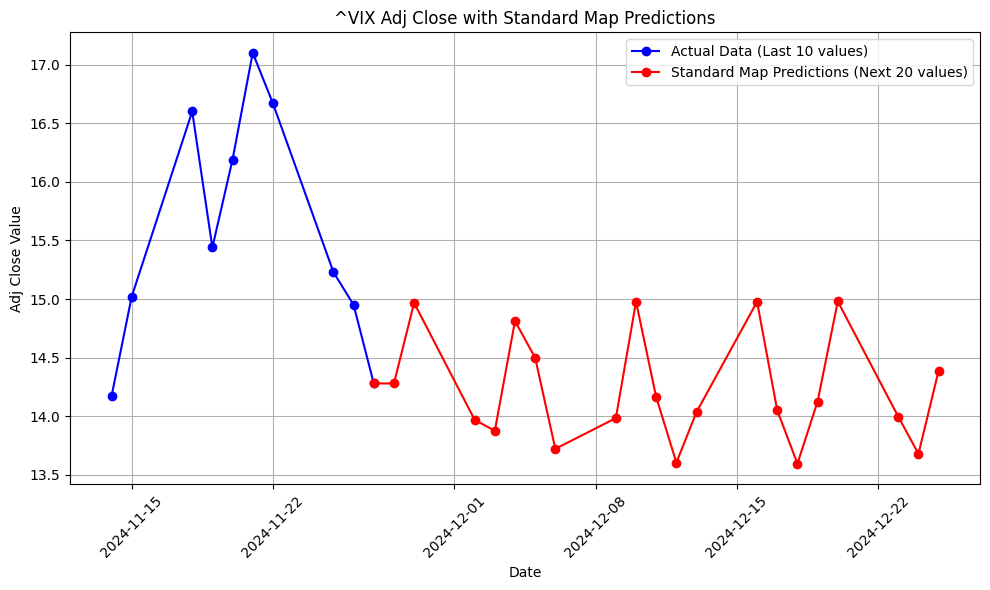

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Copy data
df = data

# Standard Map parameters
K = 1.0  # Nonlinearity parameter

# Check if df has at least 10 entries for the starting points
if len(df) >= 10:
    # Extract the last 10 `Adj Close` values as the basis for the time series
    last_10_values = df['Adj Close'].iloc[-10:].tolist()
    x, y = last_10_values[-1], last_10_values[-2]
else:
    print("DataFrame does not contain enough data points.")
    last_10_values = [1.0] * 10  # Fallback values if not enough data
    x, y = last_10_values[-1], last_10_values[-2]

# Number of new values to predict with the Standard Map
num_predictions = 20

# Arrays to store new predicted values
predicted_values = [x]  # Start with the last known value

# Generate the next 20 points using the Standard Map
for _ in range(num_predictions - 1):
    # Calculate the next values
    x_next = x + K * np.sin(y)
    y_next = y + x_next

    # Append the new prediction
    predicted_values.append(x_next)

    # Update x and y for the next iteration
    x, y = x_next, y_next

# Combine last 10 actual values with the 20 predictions
full_series = last_10_values + predicted_values

# Generate corresponding dates for the time series plot
# Assuming `Date` column exists in `df`
dates = pd.to_datetime(df['Date'].iloc[-10:].tolist())  # Last 10 dates from df
future_dates = pd.date_range(dates[-1] + pd.Timedelta(days=1), periods=num_predictions, freq='B')  # Business days for predictions
all_dates = dates.tolist() + future_dates.tolist()

# Plot the time series chart
plt.figure(figsize=(10, 6))
plt.plot(all_dates[:10], full_series[:10], 'bo-', label="Actual Data (Last 10 values)")
plt.plot(all_dates[9:], full_series[9:], 'ro-', label="Standard Map Predictions (Next 20 values)")
plt.xlabel("Date")
plt.ylabel("Adj Close Value")
plt.title(f"{ticker} Adj Close with Standard Map Predictions")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#  Quantum Neural Network for Time Series Prediction

Not working


In [ ]:
!pip install pennylane pennylane-qiskit torch numpy matplotlib

INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.1/797.1 MB 710.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.3 

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Set up the quantum device
n_qubits = 4  # Number of qubits to use in the quantum circuit
dev = qml.device("default.qubit", wires=n_qubits)

# Quantum layer definition
def quantum_layer(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# Define the QNN model
class QNN(nn.Module):
    def __init__(self, n_qubits, n_layers):
        super(QNN, self).__init__()
        self.n_qubits = n_qubits
        self.n_layers = n_layers
        # Initialize random quantum weights
        self.q_weights = torch.nn.Parameter(torch.randn(n_layers, n_qubits, 3))
        # Classical layers
        self.fc1 = nn.Linear(n_qubits, 16)
        self.fc2 = nn.Linear(16, 1)

    def forward(self, x):
        q_out = []
        # Use quantum circuit for each input data point
        for xi in x:
            q_out.append(qml.execute([quantum_layer], dev, [xi.numpy(), self.q_weights])[0])
        q_out = torch.tensor(q_out)
        # Apply classical neural network layers
        x = torch.relu(self.fc1(q_out))
        return self.fc2(x)

# Generate a toy time series data
np.random.seed(0)
n_points = 100
time_series = np.sin(np.linspace(0, 10 * np.pi, n_points)) + 0.1 * np.random.randn(n_points)

# Prepare the data for training
window_size = 10
X = []
y = []
for i in range(len(time_series) - window_size):
    X.append(time_series[i:i + window_size])
    y.append(time_series[i + window_size])
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Initialize the QNN model
qnn_model = QNN(n_qubits, n_layers=3)

# Define the optimizer and loss function
optimizer = torch.optim.Adam(qnn_model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# Train the QNN model
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = qnn_model(X)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

# Forecast the next 10 values
with torch.no_grad():
    future_X = X[-1].unsqueeze(0)  # Take the last known window
    future_preds = []
    for _ in range(10):
        future_y = qnn_model(future_X)
        future_preds.append(future_y.item())
        # Slide the window
        future_X = torch.cat([future_X[:, 1:], future_y.unsqueeze(1)], dim=1)

# Plot the results
plt.plot(range(len(time_series)), time_series, label='Actual Data')
plt.plot(range(len(time_series), len(time_series) + 10), future_preds, label='Predicted Data')
plt.legend()
plt.show()

TypeError: len() of unsized object

# VIX Days between spikes

[*********************100%***********************]  1 of 1 completed


Date
2000-11-14    1.0
2000-11-15    1.0
2000-11-16    1.0
2000-11-17    1.0
2000-11-20    3.0
             ... 
2024-12-20    1.0
2024-12-23    3.0
2024-12-24    1.0
2024-12-26    2.0
2024-12-27    1.0
Name: Date, Length: 6067, dtype: float64
Average number of days between significant VIX spikes: 1.45


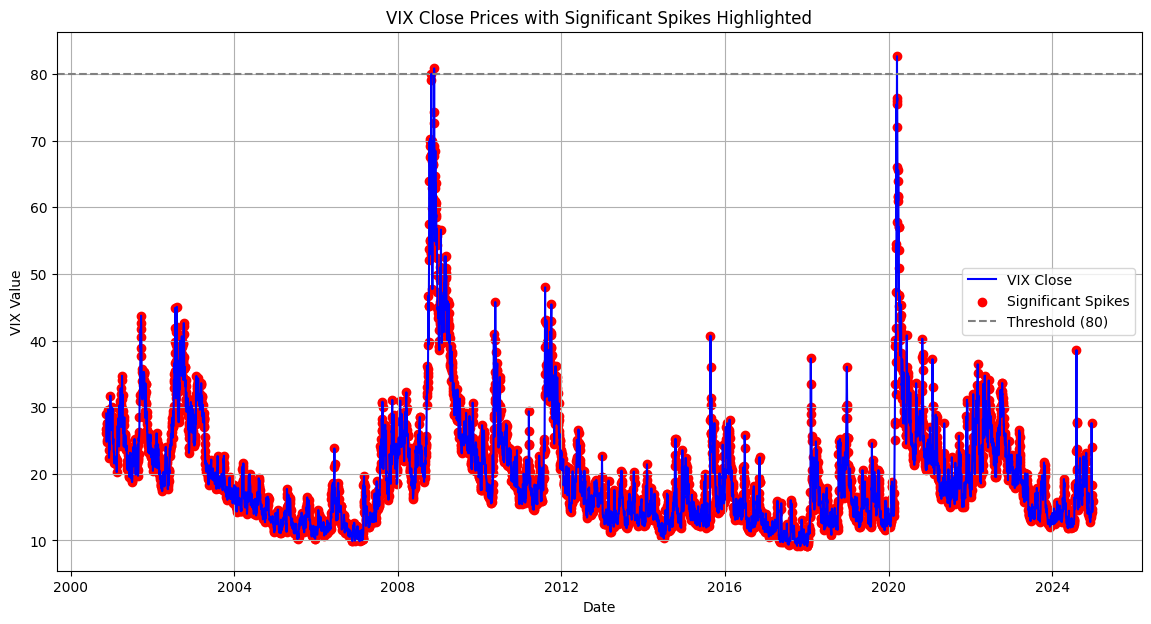

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

end = datetime.date.today().strftime("%Y-%m-%d")

# Fetch VIX data from Yahoo Finance
vix_data = yf.download('^VIX', start='2000-11-13', end=end)

# Define the threshold for significant spikes
threshold = 80

# Identify dates where VIX exceeds the threshold
spike_dates = vix_data[vix_data['Close'] > threshold].index

# Calculate the number of days between consecutive spikes
days_between_spikes = spike_dates.to_series().diff().dt.days.dropna()

print(days_between_spikes)

# Calculate the average number of days between spikes
average_days_between_spikes = days_between_spikes.mean()
print(f'Average number of days between significant VIX spikes: {average_days_between_spikes:.2f}')

plt.figure(figsize=(14, 7))
plt.plot(vix_data.index, vix_data['Close'], label='VIX Close', color='blue')
plt.scatter(spike_dates, vix_data.loc[spike_dates]['Close'], color='red', label='Significant Spikes')
plt.axhline(y=threshold, color='gray', linestyle='--', label=f'Threshold ({threshold})')
plt.title('VIX Close Prices with Significant Spikes Highlighted')
plt.xlabel('Date')
plt.ylabel('VIX Value')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  1 of 1 completed
<ipython-input-2-99bb597ea3b2>:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  close_value = float(row['Close'])


Average number of days between significant VIX spikes: 82.60
Predicted next spike date relative to today: 2025-01-17


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


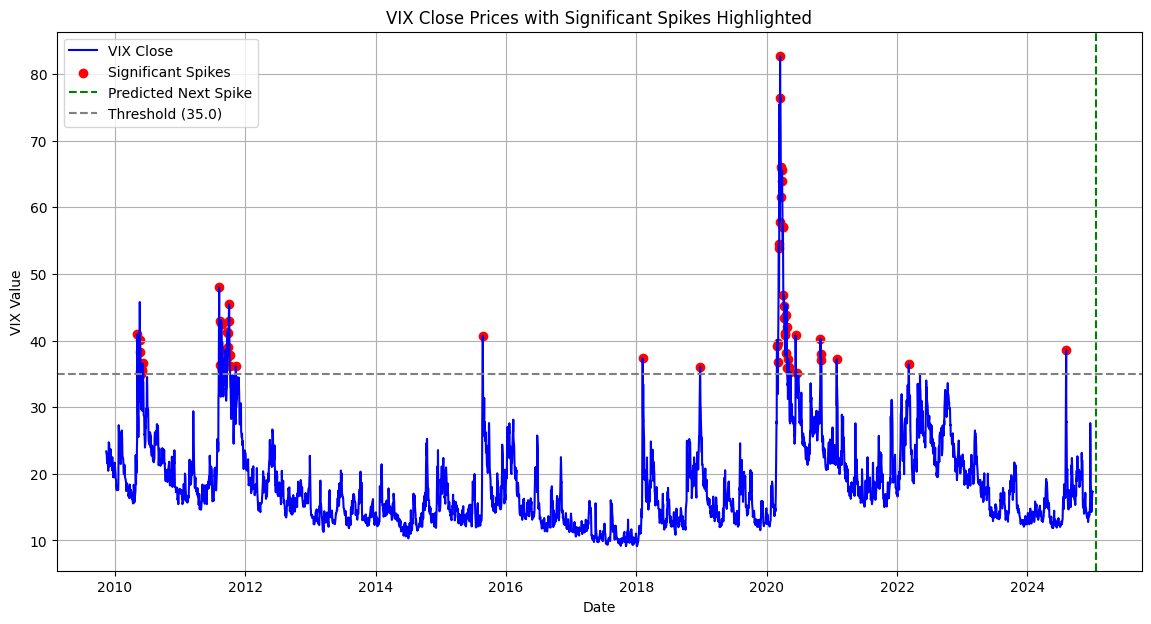

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
from datetime import datetime

end_time = dt.date.today().strftime("%Y-%m-%d")

# Fetch VIX data from Yahoo Finance
vix_data = yf.download('^VIX', start='2009-11-13', end=end_time)

# Define the threshold for significant spikes
threshold = 35.0

# Initialize list to collect spike dates
spike_dates = []

# Identify dates where VIX exceeds the threshold
for index, row in vix_data.iterrows():
    try:
        # Convert 'Close' value to float explicitly
        close_value = float(row['Close'])
        if close_value > threshold:
            # Append the date if 'Close' exceeds the threshold
            spike_dates.append(index)
    except (ValueError, TypeError) as e:
        print(f"Skipping row at index {index} due to conversion error: {e}")

# Remove consecutive spike dates (keep only the first in each streak)
unique_spike_dates = [spike_dates[0]] if spike_dates else []
for i in range(1, len(spike_dates)):
    if (spike_dates[i] - unique_spike_dates[-1]).days > 1:
        unique_spike_dates.append(spike_dates[i])

# Calculate days between consecutive unique spikes
days_between_spikes = [
    (unique_spike_dates[i] - unique_spike_dates[i - 1]).days
    for i in range(1, len(unique_spike_dates))
]

# Calculate average days between spikes
if days_between_spikes:
    average_days_between_spikes = sum(days_between_spikes) / len(days_between_spikes)
    print(f'Average number of days between significant VIX spikes: {average_days_between_spikes:.2f}')

    # Predict the next spike date relative to today
    today = pd.Timestamp(datetime.now()).tz_localize(None)
    last_spike_date = unique_spike_dates[-1].tz_localize(None)

    # Calculate the number of days since the last spike
    days_since_last_spike = (today - last_spike_date).days

    # Determine the next spike date
    if days_since_last_spike < average_days_between_spikes:
        # If we are still within the average interval, add the remaining days
        projected_days = average_days_between_spikes - days_since_last_spike
        next_spike_date = today + pd.Timedelta(days=projected_days)
    else:
        # If we've passed the interval, project the next spike based on multiples of the average
        cycles_passed = int(days_since_last_spike / average_days_between_spikes)
        next_spike_date = last_spike_date + pd.Timedelta(days=(cycles_passed + 1) * average_days_between_spikes)

    print(f'Predicted next spike date relative to today: {next_spike_date.date()}')
else:
    print(f"No significant spikes found for threshold {threshold}.")
    next_spike_date = None


# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(vix_data.index, vix_data['Close'], label='VIX Close', color='blue')

# Highlight the unique spike dates
if unique_spike_dates:
    plt.scatter(unique_spike_dates, [vix_data.loc[date]['Close'] for date in unique_spike_dates], color='red', label='Significant Spikes')

# Add predicted next spike date to the plot
if next_spike_date:
    plt.axvline(x=next_spike_date, color='green', linestyle='--', label='Predicted Next Spike')

plt.axhline(y=threshold, color='gray', linestyle='--', label=f'Threshold ({threshold})')
plt.title('VIX Close Prices with Significant Spikes Highlighted')
plt.xlabel('Date')
plt.ylabel('VIX Value')
plt.legend()
plt.grid(True)
plt.show()
